# 1. Business Understanding 

I've elected to secure 11 years' of Stack Overflow Survey data with the aspiration of doing a longitudinal analysis and identifying trends over time. My aim is to produce a blog on where tech is headed, which will translate nicely into a call to action in terms of motivating a general reader to learn the next big thing.

Who are my stakeholders? I'm seeking to communicated information to a general audience of people interested in technology, and I seek to add value in the form of useful information about trends in technology (as inferred from the Stack Overflow Survey data). But I suppose I do have in mind people much in the same boat as myself - people looking to break into the industry and who are looking for anything that might give them a bit of a competitive advantage.

I'll sharpen up the specific questions I want to answer once I have a better understanding of the data.

# 2. Data Understanding

All data from Stack Overflow's site [here](https://insights.stackoverflow.com/survey). I downloaded the zip files, and put them into one directory named 'StackOverflowData'. I had to add some prefixes for the 2017-2021 ones as they had identical file names. I've not included them in my repository. 

In [1]:
# Importing libraries and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df11 = pd.read_csv('./StackOverflowData/2011 Stack Overflow Survey Results.csv', encoding='latin_1')
df12 = pd.read_csv('./StackOverflowData/2012 Stack Overflow Survey Results.csv', encoding='latin_1')
df13 = pd.read_csv('./StackOverflowData/2013 Stack Overflow Survey Responses.csv')
df14 = pd.read_csv('./StackOverflowData/2014 Stack Overflow Survey Responses.csv')
df15 = pd.read_csv('./StackOverflowData/2015 Stack Overflow Developer Survey Responses.csv', header=1)
df16 = pd.read_csv('./StackOverflowData/2016 Stack Overflow Survey Responses.csv')
df17 = pd.read_csv('./StackOverflowData/2017_survey_results_public.csv')
df18 = pd.read_csv('./StackOverflowData/2018_survey_results_public.csv')
df19 = pd.read_csv('./StackOverflowData/2019_survey_results_public.csv')
df20 = pd.read_csv('./StackOverflowData/2020_survey_results_public.csv')
df21 = pd.read_csv('./StackOverflowData/2021_survey_results_public.csv')

C:\Users\Jamie\anaconda3\envs\juno_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (46,48,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jamie\anaconda3\envs\juno_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jamie\anaconda3\envs\juno_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
 

I want to get an idea of the shape of each dataframe here:

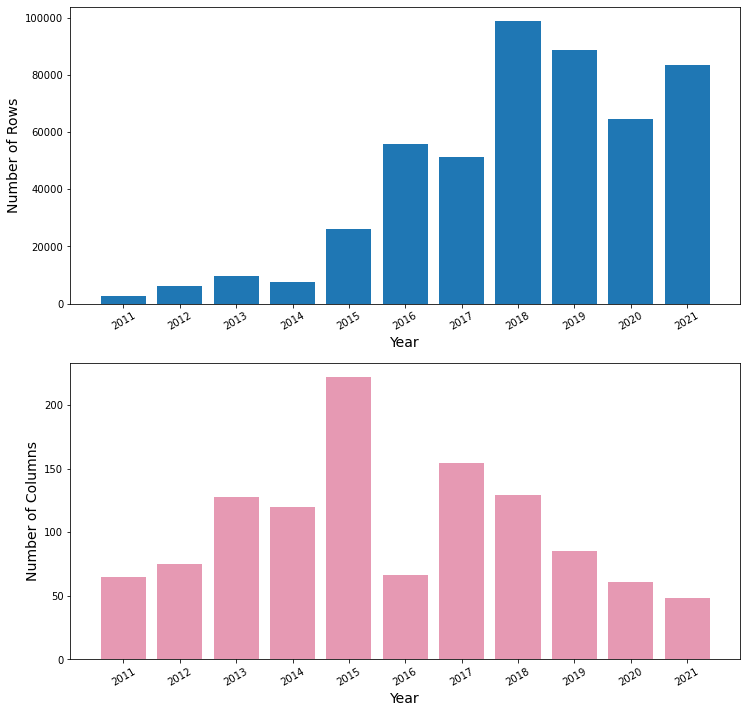

In [2]:
dataframe_list = [df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21]

rows=[]
columns=[]
for df in dataframe_list:
    rows.append(df.shape[0])
    columns.append(df.shape[1])

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)    
plt.bar(np.arange(2011,2022,1), rows)
plt.xticks(np.arange(2011,2022,1), rotation=30)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)
plt.subplot(2,1,2)    
plt.bar(np.arange(2011,2022,1), columns, color=(0.9,0.6,0.7))
plt.xticks(np.arange(2011,2022,1), rotation=30)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Columns', fontsize=14);

Even with a very cursory look at the data on Excel, I've already noted that we have very different questions year on year. This is reflected in the number of columns in the data, which varies considerably year on year (with the data set out fairly untidily in earlier datasets). 

The most notable difference is, of course, that the number of respondents has considerable increased over time. This makes inferences quite tricky for two reasons:

1. Data from 2011-2014 in particular are going to have considerable leverage. This might not necessarily be the worst problem in isolation, but...
2. It's extremely likely that respondents from those years are going to be materially different to later respondents in terms of personality, occupation, etc., and thus any trends you see are very likely to simply be changes in who has responded to the survey. 

Thus, I'm already inclined to not include data from 2011 to 2014 (and possibly 2015 as well) because I think it would probably just be misleading. Or rather, the chances of my seeing 'trends in tech' that are really just changes in whose answering the survey is rather too high. Also, since I'm after longitudinal data, so I'm looking for stability in terms of questions I can look at, so it makes sense to look for where the surveyors have already found their feet, as it were.

Something else that's interesting is the change in terms of the number of columns from 2015 to 2016 to 2017. This is worth looking at briefly.

In [3]:
list(df15.columns)

['Country',
 'Age',
 'Gender',
 'Tabs or Spaces',
 'Years IT / Programming Experience',
 'Occupation',
 'Desktop Operating System',
 'Desktop Operating System: write-in',
 'Current Lang & Tech: Android',
 'Current Lang & Tech: Arduino',
 'Current Lang & Tech: AngularJS',
 'Current Lang & Tech: C',
 'Current Lang & Tech: C++',
 'Current Lang & Tech: C++11',
 'Current Lang & Tech: C#',
 'Current Lang & Tech: Cassandra',
 'Current Lang & Tech: CoffeeScript',
 'Current Lang & Tech: Cordova',
 'Current Lang & Tech: Clojure',
 'Current Lang & Tech: Cloud',
 'Current Lang & Tech: Dart',
 'Current Lang & Tech: F#',
 'Current Lang & Tech: Go',
 'Current Lang & Tech: Hadoop',
 'Current Lang & Tech: Haskell',
 'Current Lang & Tech: iOS',
 'Current Lang & Tech: Java',
 'Current Lang & Tech: JavaScript',
 'Current Lang & Tech: LAMP',
 'Current Lang & Tech: Matlab',
 'Current Lang & Tech: MongoDB',
 'Current Lang & Tech: Node.js',
 'Current Lang & Tech: Objective-C',
 'Current Lang & Tech: Perl',
 '

In [4]:
list(df16.columns)

['Unnamed: 0',
 'collector',
 'country',
 'un_subregion',
 'so_region',
 'age_range',
 'age_midpoint',
 'gender',
 'self_identification',
 'occupation',
 'occupation_group',
 'experience_range',
 'experience_midpoint',
 'salary_range',
 'salary_midpoint',
 'big_mac_index',
 'tech_do',
 'tech_want',
 'aliens',
 'programming_ability',
 'employment_status',
 'industry',
 'company_size_range',
 'team_size_range',
 'women_on_team',
 'remote',
 'job_satisfaction',
 'job_discovery',
 'dev_environment',
 'commit_frequency',
 'hobby',
 'dogs_vs_cats',
 'desktop_os',
 'unit_testing',
 'rep_range',
 'visit_frequency',
 'why_learn_new_tech',
 'education',
 'open_to_new_job',
 'new_job_value',
 'job_search_annoyance',
 'interview_likelihood',
 'how_to_improve_interview_process',
 'star_wars_vs_star_trek',
 'agree_tech',
 'agree_notice',
 'agree_problemsolving',
 'agree_diversity',
 'agree_adblocker',
 'agree_alcohol',
 'agree_loveboss',
 'agree_nightcode',
 'agree_legacy',
 'agree_mars',
 'importan

In [5]:
list(df17.columns)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

It looks as though we have some variations in terms of how results are recorded, with the 2016 data tending to have one column per question and allow different categorical answers, and the 2015 and 2017 breaking them out into separate columns. That's an annoyance, but it explains why the number of columns is much lower for 2016.

Annoyingly for my purposes, there isn't as much consistency in questions (or at least, the data that's publicly available) as I'd like, and it's not immediately obvious to me where I might look for possible trends. What I think I'll try doing now is looking for areas of overlap. The most straightforward approach here is to look for columns with the same literal headings:

In [6]:
col16=set(list(df16.columns.str.lower()))
col17=set(list(df17.columns.str.lower()))
col18=set(list(df18.columns.str.lower()))
col19=set(list(df19.columns.str.lower()))
col20=set(list(df20.columns.str.lower()))
col21=set(list(df21.columns.str.lower()))

# Looking for common column headings between years:
len(col16 & col17), len(col17 & col18), len(col18 & col19), len(col19 & col20), len(col20 & col21)

(2, 17, 17, 45, 26)

In [7]:
col18 & col19 & col20

{'age',
 'country',
 'currencysymbol',
 'databasedesirenextyear',
 'databaseworkedwith',
 'devtype',
 'employment',
 'gender',
 'languagedesirenextyear',
 'languageworkedwith',
 'platformdesirenextyear',
 'platformworkedwith',
 'respondent',
 'undergradmajor'}

Here one can see that there's a little bit of consistency from 2018-2020, but what's happening generally is that questions are changing or more often they're just very subtle renaming of the same basic question. We can use that list as a starting point, however.

Here are some possibilities:

### Country and Gender

Are simply 'country' and 'gender' throughout. 

### Programming languages and platforms

Languagedesirenextyear is seen in 2016 as 'tech_want' (where platforms are included as well), 2017 as 'Wantworklanguage', 2021 as 'languagewanttoworkwith', and is spaced out in all the 'Future Lang & Tech' columns in 2015.

A similar thing can be done with languages one has worked with, and you can do the same worked with/desire to work with split for platforms too. The main complication is that they're only treated separately explicity in 2017 on, but it shouldn't affect things too much.

### Degree 

2016 - 'education' (will need some parsing though), 2017 - 'MajorUndergrad', 2018/2019/2020 - 'undergradmajor', but then 2021 drops it, so this is no use. 

### Age

2016 only has age ranges, but one could use midpoints, I suppose.

### Developer Type

In 2016, it's 'self_identification', in 2017, it's 'DeveloperType', and thereafter it's 'devtype'. However, the categories are so completely different that there's no continuity there. (e.g. there's stuff like 'Ninja' and 'Guru' in 2016, but 'Mobile App Developer' in 2017'. You can't use this really. 

### Organisation size

In 2016, it's 'company_size_range', then 2017/2018 - 'CompanySize', 2019/2020 - 'Orgsize', and in 2021, it's 'orgsize'. 

### Job Satisfaction 

Career satisfaction doesn't make it all the way through unfortunately, but job satisfaction does. In 2016/2017, it's 'job_satisfaction', in 2018, it's 'jobsatisfaction', in 2019/20, it's 'jobsat'. Annoyingly, it's dropped in 2021. 

### Salary

Salary is tricky because in 2021 they move to Total Compensation, with no obvious way of getting to salary (since we have no way of ascertaining how many bonuses or non-salary compensation the employee receives). I can't really use this.

I have some candidates to examine in terms of trends in tech but at this point a trend is emerging - the 2021 data is constraining what specific questions I'm likely to be able to address. It's probably best to check that dataset first and then look to see if one can match questions in earlier datasets to them.

In [8]:
col21

{'accessibility',
 'age',
 'age1stcode',
 'compfreq',
 'comptotal',
 'convertedcompyearly',
 'country',
 'currency',
 'databasehaveworkedwith',
 'databasewanttoworkwith',
 'devtype',
 'edlevel',
 'employment',
 'ethnicity',
 'gender',
 'languagehaveworkedwith',
 'languagewanttoworkwith',
 'learncode',
 'mainbranch',
 'mentalhealth',
 'misctechhaveworkedwith',
 'misctechwanttoworkwith',
 'newcollabtoolshaveworkedwith',
 'newcollabtoolswanttoworkwith',
 'newothercomms',
 'newsosites',
 'newstuck',
 'opsys',
 'orgsize',
 'platformhaveworkedwith',
 'platformwanttoworkwith',
 'responseid',
 'sexuality',
 'soaccount',
 'socomm',
 'sopartfreq',
 'sovisitfreq',
 'surveyease',
 'surveylength',
 'toolstechhaveworkedwith',
 'toolstechwanttoworkwith',
 'trans',
 'uk_country',
 'us_state',
 'webframehaveworkedwith',
 'webframewanttoworkwith',
 'yearscode',
 'yearscodepro'}

From this list, it looks as though we could sensibly also consider investigating:

* Years of coding experience ('YearsCode'), as it shows up in 2016 on estimated in 'experience_midpoint'.
* Employment

Overall, though, this is practically a case study in why consistency in survey design is so important. The way StackOverflow have gone about things has made longitudinal comparisons impossible on the majority of the data it has collected. It seems like such a shame to have gone through all that effort gathering that data over so many years to miss out on an absolute treasure trove of potentially-useful information. \*Sigh.\*

This, then, are the potential categories to investigate longitudinally from 2016 to 2021:

* Country
* Gender
* Programming languages used
* Programming languages wanting to learn 
* Platforms used
* Platforms wanting to learn
* Age
* Organisation size
* Coding experience
* Employment

# 3. Data Preparation

I'm going to investigate 

* Programming languages used
* Programming languages wanting to learn 
* Platforms used
* Platforms wanting to learn

from 2016 to 2021. I won't be needing a predictive model here, but the data are going to require a lot of cleaning and wrangling to get into a position where communicable insights can be gleaned from the data.

In [9]:
# Function that updates an initial dictionary of programming languages/platforms

def update_initial_dictionary(df, column, dictionary, seperator):
    '''
    INPUTS:
    df - the dataframe you're using to update the dictionary from
    column - the column name you're using to update the list of programming languages/platforms
    dictionary - the name of the dictionary you're updating
    seperator - the string that indicates separation between values in the column
    
    OUTPUTS
    dictionary - updated dictionary    
    '''
    for i in range(0, df.shape[0]):
        entry = df.loc[i, column]
        if type(entry) == float:
            pass
        else:
            splitentry=entry.split(seperator)
            for i in splitentry:
                if i in dictionary.keys():
                    dictionary[i]+=1
                else:
                    dictionary[i]=1
                
    return dictionary

progdict={}

# Create a list of programming languages from the 2017 want to list and worked with list
progdict = update_initial_dictionary(df17, "WantWorkLanguage", progdict, "; ")
progdict = update_initial_dictionary(df17, "HaveWorkedLanguage", progdict, "; ")
         
# Update from 2018 
progdict = update_initial_dictionary(df18, 'LanguageDesireNextYear', progdict, ";")
progdict = update_initial_dictionary(df18, 'LanguageWorkedWith', progdict, ";")

# Update from 2019 
progdict = update_initial_dictionary(df19, 'LanguageDesireNextYear', progdict, ";")
progdict = update_initial_dictionary(df19, 'LanguageWorkedWith', progdict, ";")

# Update from 2020 
progdict = update_initial_dictionary(df20, 'LanguageDesireNextYear', progdict, ";")
progdict = update_initial_dictionary(df20, 'LanguageWorkedWith', progdict, ";")

# Update from 2021 
progdict = update_initial_dictionary(df21, 'LanguageWantToWorkWith', progdict, ";")
progdict = update_initial_dictionary(df21, 'LanguageHaveWorkedWith', progdict, ";")


In [10]:
proglist=sorted(progdict.items(), key=lambda x:x[1], reverse=True)
proglist

[('JavaScript', 391916),
 ('SQL', 300611),
 ('Python', 290567),
 ('Java', 224736),
 ('HTML/CSS', 224675),
 ('C#', 192280),
 ('TypeScript', 165487),
 ('C++', 147112),
 ('PHP', 136932),
 ('C', 114942),
 ('Go', 93959),
 ('Bash/Shell', 88351),
 ('HTML', 85417),
 ('Bash/Shell/PowerShell', 84002),
 ('CSS', 81178),
 ('Kotlin', 65981),
 ('Rust', 61295),
 ('Swift', 57057),
 ('Ruby', 56348),
 ('Node.js', 52075),
 ('R', 43657),
 ('Assembly', 38395),
 ('Scala', 33771),
 ('Objective-C', 27869),
 ('Dart', 25758),
 ('VBA', 22788),
 ('Haskell', 19453),
 ('Other(s):', 15832),
 ('F#', 14813),
 ('Matlab', 14577),
 ('Perl', 14032),
 ('PowerShell', 13767),
 ('Clojure', 13412),
 ('Elixir', 11805),
 ('Groovy', 11133),
 ('Erlang', 9911),
 ('VB.NET', 9877),
 ('WebAssembly', 9455),
 ('Julia', 8130),
 ('Lua', 7225),
 ('CoffeeScript', 6683),
 ('Visual Basic 6', 5143),
 ('Delphi/Object Pascal', 3051),
 ('Delphi', 2706),
 ('LISP', 2609),
 ('Ocaml', 1613),
 ('Hack', 1429),
 ('Crystal', 1256),
 ('APL', 1104),
 ('Cobo

Here, we need to do a bit of simplifying:

* VBA, VB.NET, and Visual Basic 6 are really all variants of the same thing as should be collapsed into one category, say, VBA. 
* Bash/Shell and Powershell should be folded into Bash/Shell/Powershell. 
* COBOL and Cobol should be combined into Cobol. Although it probably doesn't matter that much because they're not very popular. 
* CSS and html should be folded into HTML/CSS.
* Delphi should be folded into Delphi/Object Pascal.
* Common Lisp should be folded into LISP.

In [11]:
# Category Dictionary Without Changes
cat_dictionary_1 = {
 'APL': 'APL',
 'Assembly': 'Assembly',
 'Bash/Shell': 'Bash/Shell',
 'Bash/Shell/PowerShell': 'Bash/Shell/PowerShell',
 'C': 'C',
 'C#': 'C#',
 'C++': 'C++',
 'COBOL': 'COBOL',
 'CSS': 'CSS',
 'Clojure': 'Clojure',
 'Cobol': 'Cobol',
 'CoffeeScript': 'CoffeeScript',
 'Common Lisp': 'Common Lisp',
 'Crystal': 'Crystal',
 'Dart': 'Dart',
 'Delphi': 'Delphi',
 'Delphi/Object Pascal': 'Delphi/Object Pascal',
 'Elixir': 'Elixir',
 'Erlang': 'Erlang',
 'F#': 'F#',
 'Go': 'Go',
 'Groovy': 'Groovy',
 'HTML': 'HTML',
 'HTML/CSS': 'HTML/CSS',
 'Hack': 'Hack',
 'Haskell': 'Haskell',
 'Java': 'Java',
 'JavaScript': 'JavaScript',
 'Julia': 'Julia',
 'Kotlin': 'Kotlin',
 'LISP': 'LISP',
 'Lua': 'Lua',
 'Matlab': 'Matlab',
 'Node.js': 'Node.js',
 'Objective-C': 'Objective-C',
 'Ocaml': 'Ocaml',
 'Other(s):': 'Other(s):',
 'PHP': 'PHP',
 'Perl': 'Perl',
 'PowerShell': 'PowerShell',
 'Python': 'Python',
 'R': 'R',
 'Ruby': 'Ruby',
 'Rust': 'Rust',
 'SQL': 'SQL',
 'Scala': 'Scala',
 'Smalltalk': 'Smalltalk',
 'Swift': 'Swift',
 'TypeScript': 'TypeScript',
 'VB.NET': 'VB.NET',
 'VBA': 'VBA',
 'Visual Basic 6': 'Visual Basic 6',
 'WebAssembly': 'WebAssembly'}

# Category Dictionary to fold VBA, VB.NET, and Visual Basic 6 into VBA, 
# Bash/Shell and Powershell into Bash/Shell/Powershell, COBOL and Cobol into Cobol,
# CSS and HTML into HTML/CSS, Delphi into Delphi/Object Pascal, and Common Lisp into LISP.
cat_dictionary_2 = {
 'APL' : 'APL',
 'Assembly' : 'Assembly',
 'Bash/Shell' : 'Bash/Shell/PowerShell',
 'Bash/Shell/PowerShell' : 'Bash/Shell/PowerShell',
 'C' : 'C',
 'C#' : 'C#',
 'C++' : 'C++',
 'COBOL' : 'Cobol',
 'CSS' : 'HTML/CSS',
 'Clojure' : 'Clojure',
 'Cobol' : 'Cobol',
 'CoffeeScript' : 'CoffeeScript',
 'Common Lisp' : 'LISP',
 'Crystal' : 'Crystal',
 'Dart' : 'Dart',
 'Delphi' : 'Delphi/Object Pascal',
 'Delphi/Object Pascal' : 'Delphi/Object Pascal',
 'Elixir' : 'Elixir',
 'Erlang' : 'Erlang',
 'F#' : 'F#',
 'Go' : 'Go',
 'Groovy' : 'Groovy',
 'HTML' : 'HTML/CSS',
 'HTML/CSS' : 'HTML/CSS',
 'Hack' : 'Hack',
 'Haskell' : 'Haskell',
 'Java' : 'Java',
 'JavaScript' : 'JavaScript',
 'Julia' : 'Julia',
 'Kotlin' : 'Kotlin',
 'LISP' : 'LISP',
 'Lua' : 'Lia',
 'Matlab' : 'Matlab',
 'Node.js' : 'Node.js',
 'Objective-C' : 'Objective-C',
 'Ocaml' : 'Ocaml',
 'Other(s):' : 'Other',
 'PHP' : 'PHP',
 'Perl' : 'Perl',
 'PowerShell' :'Bash/Shell/PowerShell',
 'Python' : 'Python',
 'R' : 'R',
 'Ruby' : 'Ruby',
 'Rust' : 'Rust',
 'SQL' : 'SQL',
 'Scala' : 'Scala',
 'Smalltalk' : 'Smalltalk',
 'Swift' : 'Swift',
 'TypeScript' : 'TypeScript',
 'VB.NET' : 'VBA',
 'VBA' : 'VBA',
 'Visual Basic 6' : 'VBA',
 'WebAssembly': 'WebAssembly'}

In [12]:
def update_prog_dictionary(df, column, dictionary, seperator, category_dictionary):
    '''
    INPUTS:
    df - the dataframe you're using to update the dictionary from
    column - the column name you're using to update the list of programming languages
    dictionary - the name of the dictionary you're updating
    seperator - the string that indicates separation between values in the column
    category_dictionary - the dictionary that puts programs into larger categories before
                            adding them to the dictionary you're updating.
    
    OUTPUTS
    dictionary - updated dictionary    
    '''
    for i in range(0, df.shape[0]):
        entry = df.loc[i, column]
        if type(entry) == float:
            pass
        else:
            splitentry=entry.split(seperator)
            
            for i in splitentry:
                
                # replace i with value from category_dictionary
                i = category_dictionary[i]
                
                if i in dictionary.keys():
                    dictionary[i]+=1
                else:
                    dictionary[i]=1
                
    return dictionary

progdict={}

# Create a list of programming languages from the 2017 want to list and worked with list
progdict = update_prog_dictionary(df17, "WantWorkLanguage", progdict, "; ", cat_dictionary_2)
progdict = update_prog_dictionary(df17, "HaveWorkedLanguage", progdict, "; ", cat_dictionary_2)
         
# Update from 2018 
progdict = update_prog_dictionary(df18, 'LanguageDesireNextYear', progdict, ";", cat_dictionary_2)
progdict = update_prog_dictionary(df18, 'LanguageWorkedWith', progdict, ";", cat_dictionary_2)

# Update from 2019 
progdict = update_prog_dictionary(df19, 'LanguageDesireNextYear', progdict, ";", cat_dictionary_2)
progdict = update_prog_dictionary(df19, 'LanguageWorkedWith', progdict, ";", cat_dictionary_2)

# Update from 2020 
progdict = update_prog_dictionary(df20, 'LanguageDesireNextYear', progdict, ";", cat_dictionary_2)
progdict = update_prog_dictionary(df20, 'LanguageWorkedWith', progdict, ";", cat_dictionary_2)

# Update from 2021 
progdict = update_prog_dictionary(df21, 'LanguageWantToWorkWith', progdict, ";", cat_dictionary_2)
progdict = update_prog_dictionary(df21, 'LanguageHaveWorkedWith', progdict, ";", cat_dictionary_2)


In [13]:
proglist=sorted(progdict.items(), key=lambda x:x[1], reverse=True)
len(proglist)

44

I still have 44 categories, which is rather a lot, so I'm going to fold Erlang, WebAssembly, Julia, Lia, CoffeeScript, Delphi/Object Pascal, LISP, Cobol, Ocaml, Hack, Crystal, APL and Smalltalk into other. This should take us down to 31 categories.

In [14]:
# Dictionary to further fold the categories
cat_dictionary_3 = {
 'APL' : 'Other',
 'Assembly' : 'Assembly',
 'Bash/Shell' : 'Bash/Shell/PowerShell',
 'Bash/Shell/PowerShell' : 'Bash/Shell/PowerShell',
 'C' : 'C',
 'C#' : 'C#',
 'C++' : 'C++',
 'COBOL' : 'Other',
 'CSS' : 'HTML/CSS',
 'Clojure' : 'Clojure',
 'Cobol' : 'Other',
 'CoffeeScript' : 'Other',
 'Common Lisp' : 'Other',
 'Crystal' : 'Other',
 'Dart' : 'Dart',
 'Delphi' : 'Other',
 'Delphi/Object Pascal' : 'Other',
 'Elixir' : 'Elixir',
 'Erlang' : 'Other',
 'F#' : 'F#',
 'Go' : 'Go',
 'Groovy' : 'Groovy',
 'HTML' : 'HTML/CSS',
 'HTML/CSS' : 'HTML/CSS',
 'Hack' : 'Other',
 'Haskell' : 'Haskell',
 'Java' : 'Java',
 'JavaScript' : 'JavaScript',
 'Julia' : 'Other',
 'Kotlin' : 'Kotlin',
 'LISP' : 'Other',
 'Lua' : 'Other',
 'Matlab' : 'Matlab',
 'Node.js' : 'Node.js',
 'Objective-C' : 'Objective-C',
 'Ocaml' : 'Other',
 'Other(s):' : 'Other',
 'PHP' : 'PHP',
 'Perl' : 'Perl',
 'PowerShell' :'Bash/Shell/PowerShell',
 'Python' : 'Python',
 'R' : 'R',
 'Ruby' : 'Ruby',
 'Rust' : 'Rust',
 'SQL' : 'SQL',
 'Scala' : 'Scala',
 'Smalltalk' : 'Other',
 'Swift' : 'Swift',
 'TypeScript' : 'TypeScript',
 'VB.NET' : 'VBA',
 'VBA' : 'VBA',
 'Visual Basic 6' : 'VBA',
 'WebAssembly': 'Other'}
progdict={}

# Create a dictionary of programming languages from the 2017 want to list and worked with list with
# with counts of how often each appears. 
progdict = update_prog_dictionary(df17, "WantWorkLanguage", progdict, "; ", cat_dictionary_3)
progdict = update_prog_dictionary(df17, "HaveWorkedLanguage", progdict, "; ", cat_dictionary_3)
         
# Update from 2018 
progdict = update_prog_dictionary(df18, 'LanguageDesireNextYear', progdict, ";", cat_dictionary_3)
progdict = update_prog_dictionary(df18, 'LanguageWorkedWith', progdict, ";", cat_dictionary_3)

# Update from 2019 
progdict = update_prog_dictionary(df19, 'LanguageDesireNextYear', progdict, ";", cat_dictionary_3)
progdict = update_prog_dictionary(df19, 'LanguageWorkedWith', progdict, ";", cat_dictionary_3)

# Update from 2020 
progdict = update_prog_dictionary(df20, 'LanguageDesireNextYear', progdict, ";", cat_dictionary_3)
progdict = update_prog_dictionary(df20, 'LanguageWorkedWith', progdict, ";", cat_dictionary_3)

# Update from 2021 
progdict = update_prog_dictionary(df21, 'LanguageWantToWorkWith', progdict, ";", cat_dictionary_3)
progdict = update_prog_dictionary(df21, 'LanguageHaveWorkedWith', progdict, ";", cat_dictionary_3)


In [15]:
proglist=sorted(progdict.items(), key=lambda x:x[1], reverse=True)
len(proglist)

31

I'm now in a position to be able to put together a new dataframe with the relevant information for each year. I'll treat each year as an observation and have counts of languages people have worked with over the past year first. I can then do a similar thing for what languages people have wanted to learn over the coming year.

In [16]:
# Need to write a new bit of code to make a dictionary for the counts for 2016:

want_lang_counts16 = {}
work_lang_counts16 = {}

for i in range(0, df16.shape[0]):
    entry = df16.loc[i, 'tech_want']
    if type(entry) == float:
        pass
    else:
        splitentry=entry.split("; ")
        for i in splitentry:
            if i not in cat_dictionary_1.keys():
                pass
            else:
                i = cat_dictionary_3[i]
                if i in want_lang_counts16.keys():
                    want_lang_counts16[i]+=1
                else:
                    want_lang_counts16[i]=1               

for i in range(0, df16.shape[0]):
    entry = df16.loc[i, 'tech_do']
    if type(entry) == float:
        pass
    else:
        splitentry=entry.split("; ")
        for i in splitentry:
            if i not in cat_dictionary_1.keys():
                pass
            else:
                i = cat_dictionary_3[i]
                if i in work_lang_counts16.keys():
                    work_lang_counts16[i]+=1
                else:
                    work_lang_counts16[i]=1               

In [17]:
# Creating dictionaries for counts for the other years:
work_lang_counts17 = {}
want_lang_counts17 = {}
work_lang_counts17 = update_prog_dictionary(df17, "WantWorkLanguage", work_lang_counts17, "; ", cat_dictionary_3)
want_lang_counts17 = update_prog_dictionary(df17, "HaveWorkedLanguage", want_lang_counts17, "; ", cat_dictionary_3)

work_lang_counts18 = {}
want_lang_counts18 = {}
want_lang_counts18 = update_prog_dictionary(df18, 'LanguageDesireNextYear', want_lang_counts18, ";", cat_dictionary_3)
work_lang_counts18 = update_prog_dictionary(df18, 'LanguageWorkedWith', work_lang_counts18, ";", cat_dictionary_3)

work_lang_counts19 = {}
want_lang_counts19 = {}
want_lang_counts19 = update_prog_dictionary(df19, 'LanguageDesireNextYear', want_lang_counts19, ";", cat_dictionary_3)
work_lang_counts19 = update_prog_dictionary(df19, 'LanguageWorkedWith', work_lang_counts19, ";", cat_dictionary_3)

work_lang_counts20 = {}
want_lang_counts20 = {}
want_lang_counts20 = update_prog_dictionary(df20, 'LanguageDesireNextYear', want_lang_counts20, ";", cat_dictionary_3)
work_lang_counts20 = update_prog_dictionary(df20, 'LanguageWorkedWith', work_lang_counts20, ";", cat_dictionary_3)

work_lang_counts21 = {}
want_lang_counts21 = {}
want_lang_counts21 = update_prog_dictionary(df21, 'LanguageWantToWorkWith', want_lang_counts21, ";", cat_dictionary_3)
work_lang_counts21 = update_prog_dictionary(df21, 'LanguageHaveWorkedWith', work_lang_counts21, ";", cat_dictionary_3)

In [18]:
# An alphabetical list so we can have a common index for forming a dataframe
alphabetical_list = sorted(progdict.keys(), key=lambda x: x[0])

# Creating a pandas series from the 2016 data
work16 = pd.Series(work_lang_counts16, name='2016', index=alphabetical_list)
# And turning it into a dataframe
work16 = pd.DataFrame(work16)

# Creating pandas series for the other datasets
work17 = pd.Series(work_lang_counts17, name='2017', index=alphabetical_list)
work18 = pd.Series(work_lang_counts18, name='2018', index=alphabetical_list)
work19 = pd.Series(work_lang_counts19, name='2019', index=alphabetical_list)
work20 = pd.Series(work_lang_counts20, name='2020', index=alphabetical_list)
work21 = pd.Series(work_lang_counts21, name='2021', index=alphabetical_list)

# Joining them together
work_df = work16.join([work17, work18, work19, work20, work21])
work_df

,2016,2017,2018,2019,2020,2021
Assembly,NaN,1923.0,5760.0,5833.0,3553.0,4632
Bash/Shell/PowerShell,NaN,NaN,31172.0,31991.0,18980.0,31256
C,7678.0,4841.0,18042.0,18017.0,12487.0,17329
Clojure,556.0,1308.0,1032.0,1254.0,NaN,1552
C#,15283.0,10187.0,26954.0,27097.0,18041.0,22984
C++,9589.0,7647.0,19872.0,20524.0,13707.0,20057
Dart,222.0,496.0,NaN,1683.0,2280.0,4965
Elixir,NaN,1565.0,NaN,1260.0,NaN,1438
F#,484.0,2034.0,1115.0,973.0,NaN,804
Go,1547.0,5770.0,5532.0,7201.0,5038.0,7879


In [19]:
# Need to convert everything into relative frequencies. These are arbitrary numbers here because
# people can pick more than one language in the survey.

rf_df = work_df.apply(lambda x: x/x.sum(), axis=0)
rf_df = rf_df.T

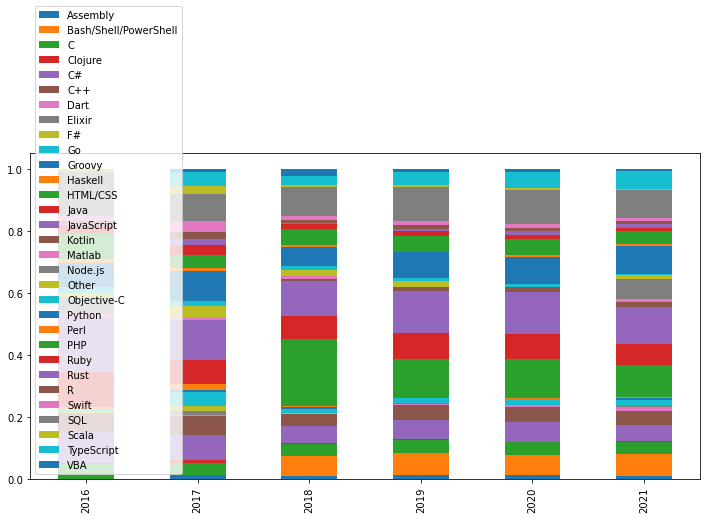

In [20]:
rf_df.plot.bar(stacked=True, figsize=(12,6));

Perhaps unsurprisingly, this isn't the most perspicacious of plots. We have too many categories.

We have issues with NaNs too. The logical solution here is either to fold categories like Perl or node.js into 'Other', or just drop them altogether. Indeed, the 'Other' category itself isn't terribly informative, so I'm wondering if I need to include that at all. 

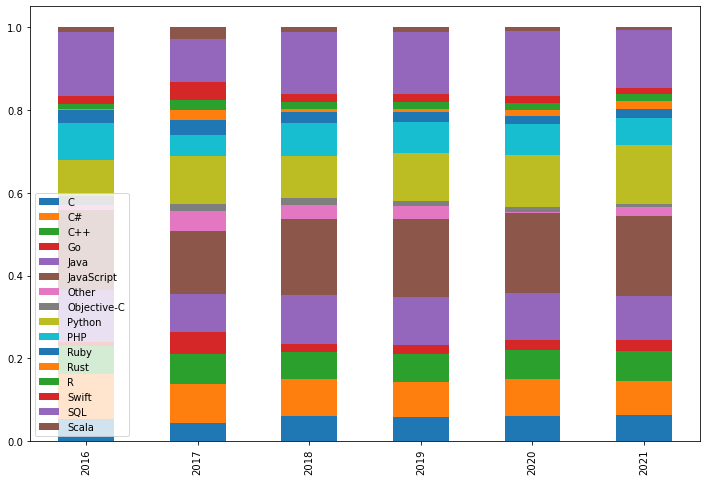

In [21]:
work_df_drop = work_df.dropna(axis=0)
rf_df_drop = work_df_drop.apply(lambda x: x/x.sum(), axis=0)
rf_df_drop = rf_df_drop.T
rf_df_drop.plot.bar(stacked=True, figsize=(12,8));

We're getting there, I'd say. But I think I should probably re-do things so that, instead of dropping NaNs, I should fold them into 'Other' instead. Also, It looks to me that there isn't anything interesting going on with Rust, Objective-C, and Scala, so I can probably include them too in 'Other'.

In [22]:
# Dictionary to further fold the categories
cat_dictionary_4 = {
 'APL' : 'Other',
 'Assembly' : 'Other',
 'Bash/Shell' : 'Other',
 'Bash/Shell/PowerShell' : 'Other',
 'C' : 'C',
 'C#' : 'C#',
 'C++' : 'C++',
 'COBOL' : 'Other',
 'CSS' : 'Other',
 'Clojure' : 'Other',
 'Cobol' : 'Other',
 'CoffeeScript' : 'Other',
 'Common Lisp' : 'Other',
 'Crystal' : 'Other',
 'Dart' : 'Other',
 'Delphi' : 'Other',
 'Delphi/Object Pascal' : 'Other',
 'Elixir' : 'Other',
 'Erlang' : 'Other',
 'F#' : 'Other',
 'Go' : 'Go',
 'Groovy' : 'Other',
 'HTML' : 'Other',
 'HTML/CSS' : 'Other',
 'Hack' : 'Other',
 'Haskell' : 'Other',
 'Java' : 'Java',
 'JavaScript' : 'JavaScript',
 'Julia' : 'Other',
 'Kotlin' : 'Other',
 'LISP' : 'Other',
 'Lua' : 'Other',
 'Matlab' : 'Other',
 'Node.js' : 'Other',
 'Objective-C' : 'Other',
 'Ocaml' : 'Other',
 'Other(s):' : 'Other',
 'PHP' : 'PHP',
 'Perl' : 'Other',
 'PowerShell' :'Other',
 'Python' : 'Python',
 'R' : 'R',
 'Ruby' : 'Ruby',
 'Rust' : 'Other',
 'SQL' : 'SQL',
 'Scala' : 'Other',
 'Smalltalk' : 'Other',
 'Swift' : 'Swift',
 'TypeScript' : 'Other',
 'VB.NET' : 'Other',
 'VBA' : 'Other',
 'Visual Basic 6' : 'Other',
 'WebAssembly': 'Other'}
progdict={}

# Create a dictionary of programming languages from the 2017 want to list and worked with list with
# with counts of how often each appears. 
progdict = update_prog_dictionary(df17, "WantWorkLanguage", progdict, "; ", cat_dictionary_4)
progdict = update_prog_dictionary(df17, "HaveWorkedLanguage", progdict, "; ", cat_dictionary_4)
         
# Update from 2018 
progdict = update_prog_dictionary(df18, 'LanguageDesireNextYear', progdict, ";", cat_dictionary_4)
progdict = update_prog_dictionary(df18, 'LanguageWorkedWith', progdict, ";", cat_dictionary_4)

# Update from 2019 
progdict = update_prog_dictionary(df19, 'LanguageDesireNextYear', progdict, ";", cat_dictionary_4)
progdict = update_prog_dictionary(df19, 'LanguageWorkedWith', progdict, ";", cat_dictionary_4)

# Update from 2020 
progdict = update_prog_dictionary(df20, 'LanguageDesireNextYear', progdict, ";", cat_dictionary_4)
progdict = update_prog_dictionary(df20, 'LanguageWorkedWith', progdict, ";", cat_dictionary_4)

# Update from 2021 
progdict = update_prog_dictionary(df21, 'LanguageWantToWorkWith', progdict, ";", cat_dictionary_4)
progdict = update_prog_dictionary(df21, 'LanguageHaveWorkedWith', progdict, ";", cat_dictionary_4)

# An alphabetical list so we can have a common index for forming a dataframe
alphabetical_list = sorted(progdict.keys(), key=lambda x: x[0])

# Creating a pandas series from the 2016 data
work16 = pd.Series(work_lang_counts16, name='2016', index=alphabetical_list)
# And turning it into a dataframe
work16 = pd.DataFrame(work16)

# Creating pandas series for the other datasets
work17 = pd.Series(work_lang_counts17, name='2017', index=alphabetical_list)
work18 = pd.Series(work_lang_counts18, name='2018', index=alphabetical_list)
work19 = pd.Series(work_lang_counts19, name='2019', index=alphabetical_list)
work20 = pd.Series(work_lang_counts20, name='2020', index=alphabetical_list)
work21 = pd.Series(work_lang_counts21, name='2021', index=alphabetical_list)

# Joining them together
work_df = work16.join([work17, work18, work19, work20, work21])
work_df

,2016,2017,2018,2019,2020,2021
C,7678,4841,18042,18017,12487,17329
C#,15283,10187,26954,27097,18041,22984
C++,9589,7647,19872,20524,13707,20057
Go,1547,5770,5532,7201,5038,7879
Java,17942,9988,35521,35917,23074,29162
JavaScript,27385,16327,54686,59219,38822,53587
Other,1662,5123,9991,9712,519,5985
Python,12282,12570,30359,36443,25287,39792
PHP,12780,5365,24071,23030,15007,18130
Ruby,4383,3966,7911,7331,4046,5569


In [57]:
work_df.sum(), df21.shape[0]

(2016    136885
 2017    100159
 2018    288732
 2019    302827
 2020    194126
 2021    267698
 dtype: int64,
 83439)

This looks to me like usable results in terms of languages respondents have used over the past year, so we just need a similar dataframe for languages they intend to learn:

In [23]:
# Creating a pandas series from the 2016 data
want16 = pd.Series(want_lang_counts16, name='2016', index=alphabetical_list)
# And turning it into a dataframe
want16 = pd.DataFrame(work16)

# Creating pandas series for the other datasets
want17 = pd.Series(want_lang_counts17, name='2017', index=alphabetical_list)
want18 = pd.Series(want_lang_counts18, name='2018', index=alphabetical_list)
want19 = pd.Series(want_lang_counts19, name='2019', index=alphabetical_list)
want20 = pd.Series(want_lang_counts20, name='2020', index=alphabetical_list)
want21 = pd.Series(want_lang_counts21, name='2021', index=alphabetical_list)

# Joining them together
want_df = want16.join([want17, want18, want19, want20, want21])
want_df

,2016,2017,2018,2019,2020,2021
C,7678,6974,10316,11143,6091,9702
C#,15283,12476,20419,22449,13674,17999
C++,9589,8155,15289,16856,9756,15249
Go,1547,1557,15529,17060,12605,15788
Java,17942,14524,22556,23508,13264,17222
JavaScript,27385,22875,38465,44739,26188,37008
Other,1662,3357,11669,18476,1661,7979
Python,12282,11704,32795,40006,26682,34929
PHP,12780,10290,12244,12837,7106,8852
Ruby,4383,3324,7824,7251,4184,4942


OK, now we need to repeat much the same process for platforms. I'll start by compiling a dictionary of all the platforms cited in the survey and go from there.

In [24]:
list(df21.columns)

['ResponseId',
 'MainBranch',
 'Employment',
 'Country',
 'US_State',
 'UK_Country',
 'EdLevel',
 'Age1stCode',
 'LearnCode',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'Currency',
 'CompTotal',
 'CompFreq',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'OpSys',
 'NEWStuck',
 'NEWSOSites',
 'SOVisitFreq',
 'SOAccount',
 'SOPartFreq',
 'SOComm',
 'NEWOtherComms',
 'Age',
 'Gender',
 'Trans',
 'Sexuality',
 'Ethnicity',
 'Accessibility',
 'MentalHealth',
 'SurveyLength',
 'SurveyEase',
 'ConvertedCompYearly']

In [25]:
platdict = {}
# Update platform dictionary from the 2017 dataframe
platdict = update_initial_dictionary(df17, "HaveWorkedPlatform", platdict, "; ")
platdict = update_initial_dictionary(df17, "WantWorkPlatform", platdict, "; ")
         
# Update from 2018 
platdict = update_initial_dictionary(df18, 'PlatformWorkedWith', platdict, ";")
platdict = update_initial_dictionary(df18, 'PlatformDesireNextYear', platdict, ";")

# Update from 2019 
platdict = update_initial_dictionary(df19, 'PlatformWorkedWith', platdict, ";")
platdict = update_initial_dictionary(df19, 'PlatformDesireNextYear', platdict, ";")

# Update from 2020 
platdict = update_initial_dictionary(df20, 'PlatformWorkedWith', platdict, ";")
platdict = update_initial_dictionary(df20, 'PlatformDesireNextYear', platdict, ";")

# Update from 2021 
platdict = update_initial_dictionary(df21, 'PlatformHaveWorkedWith', platdict, ";")
platdict = update_initial_dictionary(df21, 'PlatformWantToWorkWith', platdict, ";")

In [26]:
# Creating a category dictionary for platforms
plat_cat_dict = platdict

for key in plat_cat_dict:
    plat_cat_dict[key]=key

# creating an alphabetised list of the platforms so I can create pandas series.
alphabetical_plat_list = sorted(list(platdict.keys()))

In [27]:
# Creating dictionaries for counts for the other years:
work_plat_counts17 = {}
want_plat_counts17 = {}
work_plat_counts17 = update_prog_dictionary(df17, "HaveWorkedPlatform", work_plat_counts17, "; ", plat_cat_dict)
want_plat_counts17 = update_prog_dictionary(df17, "WantWorkPlatform", want_plat_counts17, "; ", plat_cat_dict)

work_plat_counts18 = {}
want_plat_counts18 = {}
want_plat_counts18 = update_prog_dictionary(df18, 'PlatformDesireNextYear', want_plat_counts18, ";", plat_cat_dict)
work_plat_counts18 = update_prog_dictionary(df18, 'PlatformWorkedWith', work_plat_counts18, ";", plat_cat_dict)

work_plat_counts19 = {}
want_plat_counts19 = {}
want_plat_counts19 = update_prog_dictionary(df19, 'PlatformDesireNextYear', want_plat_counts19, ";", plat_cat_dict)
work_plat_counts19 = update_prog_dictionary(df19, 'PlatformWorkedWith', work_plat_counts19, ";", plat_cat_dict)

work_plat_counts20 = {}
want_plat_counts20 = {}
want_plat_counts20 = update_prog_dictionary(df20, 'PlatformDesireNextYear', want_plat_counts20, ";", plat_cat_dict)
work_plat_counts20 = update_prog_dictionary(df20, 'PlatformWorkedWith', work_plat_counts20, ";", plat_cat_dict)

work_plat_counts21 = {}
want_plat_counts21 = {}
want_plat_counts21 = update_prog_dictionary(df21, 'PlatformWantToWorkWith', want_plat_counts21, ";", plat_cat_dict)
work_plat_counts21 = update_prog_dictionary(df21, 'PlatformHaveWorkedWith', work_plat_counts21, ";", plat_cat_dict)

In [28]:
# Creating a pandas series from the 2016 data
plat_want17 = pd.Series(want_plat_counts17, name='2017', index=alphabetical_plat_list)
# And turning it into a dataframe
plat_want17 = pd.DataFrame(plat_want17)

# Creating pandas series for the other datasets
plat_want18 = pd.Series(want_plat_counts18, name='2018', index=alphabetical_plat_list)
plat_want19 = pd.Series(want_plat_counts19, name='2019', index=alphabetical_plat_list)
plat_want20 = pd.Series(want_plat_counts20, name='2020', index=alphabetical_plat_list)
plat_want21 = pd.Series(want_plat_counts21, name='2021', index=alphabetical_plat_list)

# Joining them together
plat_want_df = plat_want17.join([plat_want18, plat_want19, plat_want20, plat_want21])
plat_want_df

,2017,2018,2019,2020,2021
AWS,NaN,18483.0,26298.0,18381.0,26295.0
Amazon Echo,NaN,5891.0,NaN,NaN,NaN
Amazon Web Services (AWS),10706.0,NaN,NaN,NaN,NaN
Android,11019.0,21789.0,24749.0,15085.0,NaN
Apple Watch or Apple TV,NaN,3387.0,NaN,NaN,NaN
Arduino,4632.0,9624.0,11143.0,6895.0,NaN
Azure,NaN,9035.0,NaN,NaN,NaN
DigitalOcean,NaN,NaN,NaN,NaN,8674.0
Docker,NaN,NaN,32963.0,23458.0,NaN
Drupal,NaN,1288.0,NaN,NaN,NaN


Oh dear. This is hopeless. The data simply aren't workable here. The biggest problem is the fact that in 2021, they decided, for reasons that are mysterious, to ask people what operating system they're using instead of what platform they're working on. This will have prompted people to omit Windows/Linox/iOS from their answers. I haven't even included 2016 yet, but there isn't a single row without a NaN. This is just not going to work. There is no way to generate meaningful insights about trends in what platforms people are using from this garbage data. Very frustrating, but I will investigate something else instead.

Let's look at organisation size.

In [29]:
list(df16['company_size_range'].unique())

[nan,
 '100-499 employees',
 'I am not part of a company',
 '10-19 employees',
 '5-9 employees',
 '20-99 employees',
 '1-4 employees',
 '500-999 employees',
 '1,000-4,999 employees',
 '10,000+ employees',
 '5,000-9,999 employees',
 'I am not sure',
 'Other (please specify)']

In [30]:
list(df17['CompanySize'].unique())

[nan,
 '20 to 99 employees',
 '10,000 or more employees',
 '10 to 19 employees',
 'Fewer than 10 employees',
 '5,000 to 9,999 employees',
 '100 to 499 employees',
 '1,000 to 4,999 employees',
 '500 to 999 employees',
 "I don't know",
 'I prefer not to answer']

In [31]:
list(df18['CompanySize'].unique())

['20 to 99 employees',
 '10,000 or more employees',
 '100 to 499 employees',
 '10 to 19 employees',
 '500 to 999 employees',
 '1,000 to 4,999 employees',
 '5,000 to 9,999 employees',
 'Fewer than 10 employees',
 nan]

In [32]:
list(df19['OrgSize'].unique())

[nan,
 '100 to 499 employees',
 '10,000 or more employees',
 'Just me - I am a freelancer, sole proprietor, etc.',
 '10 to 19 employees',
 '20 to 99 employees',
 '1,000 to 4,999 employees',
 '2-9 employees',
 '500 to 999 employees',
 '5,000 to 9,999 employees']

In [33]:
list(df20['OrgSize'].unique())

['2 to 9 employees',
 '1,000 to 4,999 employees',
 nan,
 '20 to 99 employees',
 'Just me - I am a freelancer, sole proprietor, etc.',
 '10,000 or more employees',
 '100 to 499 employees',
 '500 to 999 employees',
 '10 to 19 employees',
 '5,000 to 9,999 employees']

In [34]:
list(df21['OrgSize'].unique())

['20 to 99 employees',
 nan,
 '100 to 499 employees',
 'Just me - I am a freelancer, sole proprietor, etc.',
 '10,000 or more employees',
 '10 to 19 employees',
 '1,000 to 4,999 employees',
 '500 to 999 employees',
 '5,000 to 9,999 employees',
 '2 to 9 employees',
 'I don’t know']

This isn't looking too bad, actually. We'll have to merge some of the categories in some years to make it consistent, but this is workable. The categories should be essentially the same as that used in the 2018 survey:

* 1 to 9 employees
* 10 to 19 employees
* 20 to 99 employees
* 100 to 499 employees
* 500 to 999 employees
* 1000 to 4999 employees
* 5000 to 9999 employees
* 10000 or more employees

In [35]:
orgsize_cat_dict = {'100-499 employees':'100 to 499 employees',
 'I am not part of a company':np.nan,
 '10-19 employees':'10 to 19 employees',
 '5-9 employees':'1 to 9 employees',
 '20-99 employees':'20 to 99 employees',
 '1-4 employees':'1 to 9 employees',
 '500-999 employees':'500 to 999 employees',
 '1,000-4,999 employees':'1,000 to 4,999 employees',
 '10,000+ employees':'10,000 or more employees',
 '5,000-9,999 employees':'5,000 to 9,999 employees',
 'I am not sure':np.nan,
 'Other (please specify)':np.nan,
 'I don’t know':np.nan,
 "I don't know":np.nan,
 'I prefer not to answer':np.nan,
 'Just me - I am a freelancer, sole proprietor, etc.':'1 to 9 employees',
 '2-9 employees':'1 to 9 employees',
 '2 to 9 employees':'1 to 9 employees',
 '20 to 99 employees': '20 to 99 employees',
 '10,000 or more employees': '10,000 or more employees',
 '100 to 499 employees': '100 to 499 employees',
 '10 to 19 employees': '10 to 19 employees',
 '500 to 999 employees': '500 to 999 employees',
 '1,000 to 4,999 employees': '1,000 to 4,999 employees',
 '5,000 to 9,999 employees': '5,000 to 9,999 employees',
 'Fewer than 10 employees': '1 to 9 employees'}

In [36]:
def update_orgsize_dictionary(df, column, dictionary, category_dictionary):
    '''
    INPUTS:
    df - the dataframe you're using to update the dictionary from
    column - the column name for orgsize
    dictionary - the name of the dictionary you're updating
    category_dictionary - the dictionary that puts the orgsize value into the right category
        
    OUTPUTS
    dictionary - updated dictionary    
    '''
    for i in range(0, df.shape[0]):
        entry = df.loc[i, column]
        if type(entry) == float:
            pass
        else:
            # replace entry with value from category_dictionary
            entry = category_dictionary[entry]
            if entry in dictionary.keys():
                dictionary[entry]+=1
            else:
                dictionary[entry]=1
                
    return dictionary

orgdict={}

# Creating dictionaries for counts:
org_counts16 = {}
org_counts16 = update_orgsize_dictionary(df16, "company_size_range", org_counts16, orgsize_cat_dict)
org_counts17 = {}
org_counts17 = update_orgsize_dictionary(df17, "CompanySize", org_counts17, orgsize_cat_dict)
org_counts18 = {}
org_counts18 = update_orgsize_dictionary(df18, "CompanySize", org_counts18, orgsize_cat_dict)
org_counts19 = {}
org_counts19 = update_orgsize_dictionary(df19, "OrgSize", org_counts19, orgsize_cat_dict)
org_counts20 = {}
org_counts20 = update_orgsize_dictionary(df20, "OrgSize", org_counts20, orgsize_cat_dict)
org_counts21 = {}
org_counts21 = update_orgsize_dictionary(df21, "OrgSize", org_counts21, orgsize_cat_dict)

In [37]:
alpha_org_list = ['10,000 or more employees', '5,000 to 9,999 employees',
                  '1,000 to 4,999 employees', '500 to 999 employees', '100 to 499 employees', 
                  '20 to 99 employees', '10 to 19 employees', '1 to 9 employees']

# Creating a pandas series from the 2016 data
org16 = pd.Series(org_counts16, name='2016', index=alpha_org_list)
# And turning it into a dataframe
org_df = pd.DataFrame(org16/org16.sum())

# Creating pandas series for the other datasets
org17 = pd.Series(org_counts17, name='2017', index=alpha_org_list)
org18 = pd.Series(org_counts18, name='2018', index=alpha_org_list)
org19 = pd.Series(org_counts19, name='2019', index=alpha_org_list)
org20 = pd.Series(org_counts20, name='2020', index=alpha_org_list)
org21 = pd.Series(org_counts21, name='2021', index=alpha_org_list)

# Joining them together (dividing by number of rows so values reflect
# proportions of non-NaN respondents)
org_df = org_df.join([org17/org17.sum(), org18/org18.sum(), org19/org19.sum(), 
                      org20/org20.sum(), org21/org21.sum()])
org_df

,2016,2017,2018,2019,2020,2021
"10,000 or more employees",0.123417,0.151985,0.136402,0.141341,0.138697,0.135013
"5,000 to 9,999 employees",0.035947,0.042920,0.042178,0.041579,0.040781,0.038385
"1,000 to 4,999 employees",0.094287,0.102510,0.106723,0.104749,0.109690,0.105892
500 to 999 employees,0.060411,0.066520,0.064727,0.063727,0.064961,0.063818
100 to 499 employees,0.178321,0.194638,0.195873,0.178769,0.187463,0.176952
20 to 99 employees,0.225910,0.229771,0.237603,0.211712,0.216470,0.210655
10 to 19 employees,0.104145,0.109788,0.111937,0.094274,0.093089,0.091019
1 to 9 employees,0.177561,0.101868,0.104556,0.163851,0.148847,0.178266


Alongside this information, it would probably be useful to have information about employment status. Below is a quick check of the relevant entries in each dataframe:

In [38]:
# Create list of unique entries in each dataframe
df16list=df16['employment_status'].unique()
df17list=df17['EmploymentStatus'].unique()
df18list=df18['Employment'].unique()
df19list=df19['Employment'].unique()
df20list=df20['Employment'].unique()
df21list=df21['Employment'].unique()

#Create list of unique entries over all 6 dataframe
unique_entries = []
for listitem in [df16list, df17list, df18list, df19list, df20list, df21list]:
    print(listitem)
    for item in listitem:
        if item in unique_entries:
            pass
        else: 
            unique_entries.append(item)

# Create category dictionary from list
empl_cat_dict = {}
for i in unique_entries:
    empl_cat_dict[i]=i

[nan 'Employed full-time' 'Freelance / Contractor' 'Self-employed'
 "I'm a student" 'Unemployed' 'Prefer not to disclose'
 'Employed part-time' 'Other (please specify)' 'Retired']
['Not employed, and not looking for work' 'Employed part-time'
 'Employed full-time'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, but looking for work' 'I prefer not to say' 'Retired']
['Employed part-time' 'Employed full-time'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Not employed, but looking for work' nan 'Retired']
['Not employed, and not looking for work'
 'Not employed, but looking for work' 'Employed full-time'
 'Independent contractor, freelancer, or self-employed' nan
 'Employed part-time' 'Retired']
['Independent contractor, freelancer, or self-employed'
 'Employed full-time' nan 'Student' 'Not employed, but looking for work'
 'Employed part-time' 'Retired' 'Not employed, and not looking for work']
['Independent con

Like with organisation size, we have relatively similar categories year to year, but I'll have to merge some categories to keep it consistent:

* Retired
* Self-Employed - this includes freelance and contractor
* Full-Time Employee
* Part-Time Employee
* Unemployed
* Student

In [39]:
# Category dictionary for Employment Status that uses the above categories
empl_cat_dict = {
 'Employed full-time': 'Full-Time Employee',
 'Freelance / Contractor': 'Self-employed',
 'Self-employed': 'Self-employed',
 "I'm a student": "Student",
 'Unemployed': 'Unemployed',
 'Prefer not to disclose': np.nan,
 'Employed part-time': 'Part-Time Employee',
 'Other (please specify)': np.nan,
 'Retired': 'Retired',
 'Not employed, and not looking for work': 'Unemployed',
 'Independent contractor, freelancer, or self-employed': 'Self-employed',
 'Not employed, but looking for work': 'Unemployed',
 'I prefer not to say': np.nan,
 'Student': 'Student',
 'Student, full-time': 'Student',
 'Student, part-time': 'Student'}

In [40]:
def update_empl_dictionary(df, column, dictionary, category_dictionary):
    '''
    INPUTS:
    df - the dataframe you're using to update the dictionary from
    column - the column name for employment
    dictionary - the name of the dictionary you're updating
    category_dictionary - the dictionary that puts the orgsize value into the right category
        
    OUTPUTS
    dictionary - updated dictionary    
    '''
    for i in range(0, df.shape[0]):
        entry = df.loc[i, column]
        if type(entry) == float:
            pass
        else:
            # replace entry with value from category_dictionary
            entry = category_dictionary[entry]
            if entry in dictionary.keys():
                dictionary[entry]+=1
            else:
                dictionary[entry]=1
                
    return dictionary

# Creating dictionaries for counts:
empl_counts16 = {}
empl_counts16 = update_empl_dictionary(df16, "employment_status", empl_counts16, empl_cat_dict)
empl_counts17 = {}
empl_counts17 = update_empl_dictionary(df17, "EmploymentStatus", empl_counts17, empl_cat_dict)
empl_counts18 = {}
empl_counts18 = update_empl_dictionary(df18, "Employment", empl_counts18, empl_cat_dict)
empl_counts19 = {}
empl_counts19 = update_empl_dictionary(df19, "Employment", empl_counts19, empl_cat_dict)
empl_counts20 = {}
empl_counts20 = update_empl_dictionary(df20, "Employment", empl_counts20, empl_cat_dict)
empl_counts21 = {}
empl_counts21 = update_empl_dictionary(df21, "Employment", empl_counts21, empl_cat_dict)

In [41]:
empl_counts21.keys()

dict_keys(['Self-employed', 'Student', 'Full-Time Employee', nan, 'Part-Time Employee', 'Unemployed', 'Retired'])

In [42]:
alpha_empl_list = ['Full-Time Employee', 'Part-Time Employee', 'Self-employed',
                   'Student', 'Unemployed', 'Retired']

# Creating a pandas series from the 2016 data
empl16 = pd.Series(empl_counts16, name='2016', index=alpha_empl_list)
# And turning it into a dataframe
empl_df = pd.DataFrame(empl16/empl16.sum())

# Creating pandas series for the other datasets
empl17 = pd.Series(empl_counts17, name='2017', index=alpha_empl_list)
empl18 = pd.Series(empl_counts18, name='2018', index=alpha_empl_list)
empl19 = pd.Series(empl_counts19, name='2019', index=alpha_empl_list)
empl20 = pd.Series(empl_counts20, name='2020', index=alpha_empl_list)
empl21 = pd.Series(empl_counts21, name='2021', index=alpha_empl_list)

# Joining them together (dividing by number of rows so values reflect
# proportions of non-NaN respondents)
empl_df = empl_df.join([empl17/empl17.sum(), empl18/empl18.sum(), empl19/empl19.sum(), 
                        empl20/empl20.sum(), empl21/empl21.sum()])
empl_df

,2016,2017,2018,2019,2020,2021
Full-Time Employee,0.695824,0.718562,0.739554,0.739152,0.708961,0.650031
Part-Time Employee,0.036290,0.063213,0.056441,0.051261,0.034720,0.029855
Self-employed,0.116637,0.104023,0.097376,0.097624,0.088828,0.097546
Student,0.129852,NaN,NaN,NaN,0.121950,0.167797
Unemployed,0.018953,0.110862,0.104248,0.107856,0.041736,0.050817
Retired,0.002444,0.003340,0.002381,0.004106,0.003806,0.003955


Argh. Another snag. I probably should have noticed this before, but 2017-2019 don't include entries for student in the employment column, and they're clearly being included in 'unemployed' instead. It would be nice to use the 'MainBranch' entries so as to have a standard result for whether the respondent considers themselves a student (regardless of their employment status), but they only exist for 2019-21. 2018 has a column for 'Student', 2017 has a column for 'Professional', but then 2016 doesn't have anything equivalent.

I don't think there's any way to salvage this data here. The problem is that different years are dealing with students in different ways, with some taking the possibility of working whilst studying as an option, and others not, and no way to tell how many.

I'm fast running out of things that I can even investigate across time, let alone ones that might be interesting to stakeholders. Gender is completely uninteresting - it was male-dominated, and still is. Age and coding experience are going to be hamstrung by the fact we have to use midpoints for some years, which means that the data aren't going to be very sensitive. So that literally just leaves Country. I'm anticipating that it will be heavily US-dominated as StackOverflow is an English website, but it might be worth investigating to see if there is any evidence that the world of tech is becoming more geodiverse?

In [43]:
# Create list of unique entries in each dataframe
df16list=df16['country'].unique()
df17list=df17['Country'].unique()
df18list=df18['Country'].unique()
df19list=df19['Country'].unique()
df20list=df20['Country'].unique()
df21list=df21['Country'].unique()

#Create list of unique entries over all 6 dataframe
unique_entries = []
for listitem in [df16list, df17list, df18list, df19list, df20list, df21list]:
    for item in listitem:
        if type(item) != str:
            pass
        elif item in unique_entries:
            pass
        else: 
            unique_entries.append(item)

# Create category dictionary from list
cnt_cat_dict = {}
unique_entries = sorted(unique_entries)
for i in unique_entries:
    cnt_cat_dict[i]=i

In [44]:
# category dictionary of UN-recognised countries with their most common short names in English
UNcnt_cat_dict={
 'Afghanistan': 'Afghanistan',
 'Aland Islands': 'Finland',
 'Albania': 'Albania',
 'Algeria': 'Algeria',
 'American Samoa': 'USA',
 'Andorra': 'Andorra',
 'Angola': 'Angola',
 'Anguilla': 'UK',
 'Antarctica': 'Antarctica',
 'Antigua & Deps': 'Antigua and Barbuda',
 'Antigua and Barbuda': 'Antigua and Barbuda',
 'Argentina': 'Argentina',
 'Armenia': 'Armenia',
 'Aruba': 'Netherlands',
 'Australia': 'Australia',
 'Austria': 'Austria',
 'Azerbaidjan': 'Azerbaijan',
 'Azerbaijan': 'Azerbaijan',
 'Bahamas': 'Bahamas',
 'Bahrain': 'Bahrain',
 'Bangladesh': 'Bangladesh',
 'Barbados': 'Barbados',
 'Belarus': 'Belarus',
 'Belgium': 'Belgium',
 'Belize': 'Belize',
 'Benin': 'Benin',
 'Bermuda': 'Bermuda',
 'Bhutan': 'Bhutan',
 'Bolivia': 'Bolivia',
 'Bosnia Herzegovina': 'Bosnia-Herzegovina',
 'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
 'Bosnia-Herzegovina': 'Bosnia-Herzegovina',
 'Botswana': 'Botswana',
 'Bouvet Island': 'Norway',
 'Brazil': 'Brazil',
 'British Indian Ocean Territory': 'UK',
 'Brunei Darussalam': 'Brunei',
 'Bulgaria': 'Bulgaria',
 'Burkina': 'Burkina Faso',
 'Burkina Faso': 'Burkina Faso',
 'Burundi': 'Burundi',
 'Cambodia': 'Cambodia',
 'Cameroon': 'Cameroon',
 'Canada': 'Canada',
 'Cape Verde': 'Cape Verde',
 'Cayman Islands': 'UK',
 'Central African Rep': 'Central African Republic',
 'Central African Republic': 'Central African Republic',
 'Chad': 'Chad',
 'Chile': 'Chile',
 'China': 'China',
 'Christmas Island': 'Australia',
 'Colombia': 'Colombia',
 'Comoros': 'Comoros',
 'Congo, Republic of the...': 'Republic of the Congo',
 'Cook Islands': 'New Zealand',
 'Costa Rica': 'Costa Rica',
 'Croatia': 'Croatia',
 'Cuba': 'Cuba',
 'Cyprus': 'Cyprus',
 'Czech Republic': 'Czechia',
 "Côte d'Ivoire": "Ivory Coast",
 "Democratic People's Republic of Korea": "North Korea",
 'Democratic Republic of the Congo': 'Democratic Republic of the Congo',
 'Denmark': 'Denmark',
 'Djibouti': 'Djibouti',
 'Dominica': 'Dominica',
 'Dominican Republic': 'Dominican Republic',
 'East Timor': 'East Timor',
 'Ecuador': 'Ecuador',
 'Egypt': 'Egypt',
 'El Salvador': 'El Salvador',
 'Eritrea': 'Eritrea',
 'Estonia': 'Estonia',
 'Ethiopia': 'Ethiopia',
 'Falkland Islands': 'UK',
 'Fiji': 'Fiji',
 'Finland': 'Finland',
 'France': 'France',
 'French Guyana': 'France',
 'Gabon': 'Gabon',
 'Gambia': 'Gambia',
 'Georgia': 'Georgia',
 'Germany': 'Germany',
 'Ghana': 'Ghana',
 'Gibraltar': 'UK',
 'Greece': 'Greece',
 'Grenada': 'Grenada',
 'Guam': 'USA',
 'Guatemala': 'Guatemala',
 'Guinea': 'Guinea',
 'Guinea-Bissau': 'Guinea-Bissau',
 'Guyana': 'Guyana',
 'Haiti': 'Haiti',
 'Heard and McDonald Islands': 'Australia',
 'Honduras': 'Honduras',
 'Hong Kong': 'Hong Kong',
 'Hong Kong (S.A.R.)': 'Hong Kong',
 'Hungary': 'Hungary',
 'I prefer not to say': np.nan,
 'Iceland': 'Iceland',
 'India': 'India',
 'Indonesia': 'Indonesia',
 'Iran': 'Iran',
 'Iran, Islamic Republic of...': 'Iran',
 'Iraq': 'Iraq',
 'Ireland': 'Ireland',
 'Ireland {Republic}': 'Ireland',
 'Isle of Man': 'UK',
 'Israel': 'Israel',
 'Italy': 'Italy',
 'Ivory Coast': 'Ivory Coast',
 "Ivory Coast (Cote D'Ivoire)": "Ivory Coast",
 'Jamaica': 'Jamaica',
 'Japan': 'Japan',
 'Jordan': 'Jordan',
 'Kazakhstan': 'Kazakhstan',
 'Kenya': 'Kenya',
 'Kiribati': 'Kiribati',
 'Korea North': 'North Korea',
 'Korea South': 'South Korea',
 'Kosovo': 'Kosovo',
 'Kuwait': 'Kuwait',
 'Kyrgyzstan': 'Kyrgyzstan',
 "Lao People's Democratic Republic": "Laos",
 'Laos': 'Laos',
 'Latvia': 'Latvia',
 'Lebanon': 'Lebanon',
 'Lesotho': 'Lesotho',
 'Liberia': 'Liberia',
 'Libya': 'Libya',
 'Libyan Arab Jamahiriya': 'Libya',
 'Liechtenstein': 'Liechtenstein',
 'Lithuania': 'Lithuania',
 'Luxembourg': 'Luxembourg',
 'Macau': 'China',
 'Macedonia': 'Macedonia',
 'Madagascar': 'Madagascar',
 'Malawi': 'Malawi',
 'Malaysia': 'Malaysia',
 'Maldives': 'Maldives',
 'Mali': 'Mali',
 'Malta': 'Malta',
 'Marshall Islands': 'Marshall Islands',
 'Martinique (French)': 'France',
 'Mauritania': 'Mauritania',
 'Mauritius': 'Mauritius',
 'Mexico': 'Mexico',
 'Micronesia': 'Micronesia',
 'Micronesia, Federated States of...': 'Micronesia',
 'Moldavia': 'Moldova',
 'Moldova': 'Moldova',
 'Monaco': 'Monaco',
 'Mongolia': 'Mongolia',
 'Montenegro': 'Montenegro',
 'Montserrat': 'UK',
 'Morocco': 'Morocco',
 'Mozambique': 'Mozambique',
 'Myanmar': 'Myanmar',
 'Myanmar, {Burma}': 'Myanmar',
 'Namibia': 'Namibia',
 'Nauru': 'Nauru',
 'Nepal': 'Nepal',
 'Netherlands': 'Netherlands',
 'Netherlands Antilles': 'Netherlands',
 'New Caledonia (French)': 'France',
 'New Zealand': 'New Zealand',
 'Nicaragua': 'Nicaragua',
 'Niger': 'Niger',
 'Nigeria': 'Nigeria',
 'Nomadic': np.nan,
 'North Korea': 'North Korea',
 'Northern Mariana Islands': 'USA',
 'Norway': 'Norway',
 'Oman': 'Oman',
 'Other (please specify)': np.nan,
 'Other Country (Not Listed Above)': np.nan,
 'Pakistan': 'Pakistan',
 'Palau': 'Palau',
 'Palestine': 'Israel',
 'Panama': 'Panama',
 'Papua New Guinea': 'Papua New Guinea',
 'Paraguay': 'Paraguay',
 'Peru': 'Peru',
 'Philippines': 'Philippines',
 'Pitcairn Island': 'UK',
 'Poland': 'Poland',
 'Polynesia (French)': 'France',
 'Portugal': 'Portugal',
 'Puerto Rico': 'USA',
 'Qatar': 'Qatar',
 'Republic of Korea': 'South Korea',
 'Republic of Moldova': 'Moldova',
 'Reunion (French)': 'France',
 'Romania': 'Romania',
 'Russian Federation': 'Russia',
 'Rwanda': 'Rwanda',
 'S. Georgia & S. Sandwich Isls.': 'UK',
 'Saint Helena': 'UK',
 'Saint Kitts and Nevis': 'Saint Kitts and Nevis',
 'Saint Lucia': 'Saint Lucia',
 'Saint Vincent & Grenadines': 'Saint Vincent and the Grenadines',
 'Saint Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
 'San Marino': 'San Marino',
 'Sao Tome & Principe': 'Sao Tome and Principe',
 'Sao Tome and Principe': 'Sao Tome and Principe',
 'Saudi Arabia': 'Saudi Arabia',
 'Senegal': 'Senegal',
 'Serbia': 'Serbia',
 'Seychelles': 'Seychelles',
 'Sierra Leone': 'Sierra Leone',
 'Singapore': 'Singapore',
 'Slovak Republic': 'Slovakia',
 'Slovakia': 'Slovakia',
 'Slovenia': 'Slovenia',
 'Solomon Islands': 'Solomon Islands',
 'Somalia': 'Somalia',
 'South Africa': 'South Africa',
 'South Korea': 'South Korea',
 'Spain': 'Spain',
 'Sri Lanka': 'Sri Lanka',
 'St Kitts & Nevis': 'Saint Kitts and Nevis',
 'Sudan': 'Sudan',
 'Suriname': 'Suriname',
 'Swaziland': 'Eswatini',
 'Sweden': 'Sweden',
 'Switzerland': 'Switzerland',
 'Syria': 'Syria',
 'Syrian Arab Republic': 'Syria',
 'Tadjikistan': 'Tajikistan',
 'Taiwan': 'Taiwan',
 'Tajikistan': 'Tajikistan',
 'Tanzania': 'Tanzania',
 'Thailand': 'Thailand',
 'The former Yugoslav Republic of Macedonia': 'Macedonia',
 'Timor-Leste': 'East Timor',
 'Togo': 'Togo',
 'Tonga': 'Tonga',
 'Trinidad & Tobago': 'Trinidad and Tobago',
 'Trinidad and Tobago': 'Trinidad and Tobago',
 'Tunisia': 'Tunisia',
 'Turkey': 'Turkey',
 'Turkmenistan': 'Turkmenistan',
 'Tuvalu': 'Tuvalu',
 'U.S. Minor Outlying Islands': 'USA',
 'Uganda': 'Uganda',
 'Ukraine': 'Ukraine',
 'United Arab Emirates': 'United Arab Emirates',
 'United Kingdom': 'UK',
 'United Kingdom of Great Britain and Northern Ireland': 'UK',
 'United Republic of Tanzania': 'Tanzania',
 'United States': 'USA',
 'United States of America': 'USA',
 'Uruguay': 'Uruguay',
 'Uzbekistan': 'Uzbekistan',
 'Vanuatu': 'Vanuatu',
 'Vatican City': 'Vatican City',
 'Vatican City State': 'Vatican City',
 'Venezuela': 'Venezuela',
 'Venezuela, Bolivarian Republic of...': 'Venezuela',
 'Viet Nam': 'Vietnam',
 'Vietnam': 'Vietnam',
 'Virgin Islands (British)': 'UK',
 'Virgin Islands (USA)': 'USA',
 'Yemen': 'Yemen',
 'Zaire': 'Democratic Republic of the Congo',
 'Zambia': 'Zambia',
 'Zimbabwe': 'Zimbabwe'}

In [45]:
def update_cnt_dictionary(df, column, dictionary, category_dictionary):
    '''
    INPUTS:
    df - the dataframe you're using to update the dictionary from
    column - the column name for country
    dictionary - the name of the dictionary you're updating
    category_dictionary - the dictionary that puts the orgsize value into the right category
        
    OUTPUTS
    dictionary - updated dictionary    
    '''
    for i in range(0, df.shape[0]):
        entry = df.loc[i, column]
        if type(entry) == float:
            pass
        else:
            # replace entry with value from category_dictionary
            entry = category_dictionary[entry]
            if entry in dictionary.keys():
                dictionary[entry]+=1
            else:
                dictionary[entry]=1
                
    return dictionary

# Creating dictionaries for counts:
cnt_counts16 = {}
cnt_counts16 = update_cnt_dictionary(df16, "country", cnt_counts16, UNcnt_cat_dict)
cnt_counts17 = {}
cnt_counts17 = update_cnt_dictionary(df17, "Country", cnt_counts17, UNcnt_cat_dict)
cnt_counts18 = {}
cnt_counts18 = update_cnt_dictionary(df18, "Country", cnt_counts18, UNcnt_cat_dict)
cnt_counts19 = {}
cnt_counts19 = update_cnt_dictionary(df19, "Country", cnt_counts19, UNcnt_cat_dict)
cnt_counts20 = {}
cnt_counts20 = update_cnt_dictionary(df20, "Country", cnt_counts20, UNcnt_cat_dict)
cnt_counts21 = {}
cnt_counts21 = update_cnt_dictionary(df21, "Country", cnt_counts21, UNcnt_cat_dict)

# Producing alphabetised list of countries for creating pandas series
UN_cnt_list = []
for i in UNcnt_cat_dict.values():
    if i in UN_cnt_list:
        pass
    elif type(i) != str:
        pass
    else:
        UN_cnt_list.append(i)
UN_cnt_list = sorted(UN_cnt_list)

# Creating a pandas series from the 2016 data
cnt16 = pd.Series(cnt_counts16, name='2016', index=UN_cnt_list)
# And turning it into a dataframe
cnt_df = pd.DataFrame(cnt16/cnt16.sum())

# Creating pandas series for the other datasets
cnt17 = pd.Series(cnt_counts17, name='2017', index=UN_cnt_list)
cnt18 = pd.Series(cnt_counts18, name='2018', index=UN_cnt_list)
cnt19 = pd.Series(cnt_counts19, name='2019', index=UN_cnt_list)
cnt20 = pd.Series(cnt_counts20, name='2020', index=UN_cnt_list)
cnt21 = pd.Series(cnt_counts21, name='2021', index=UN_cnt_list)

# Joining them together (dividing by number of rows so values reflect
# proportions of non-NaN respondents)
cnt_df = cnt_df.join([cnt17/cnt17.sum(), cnt18/cnt18.sum(), cnt19/cnt19.sum(), 
                       cnt20/cnt20.sum(), cnt21/cnt21.sum()])

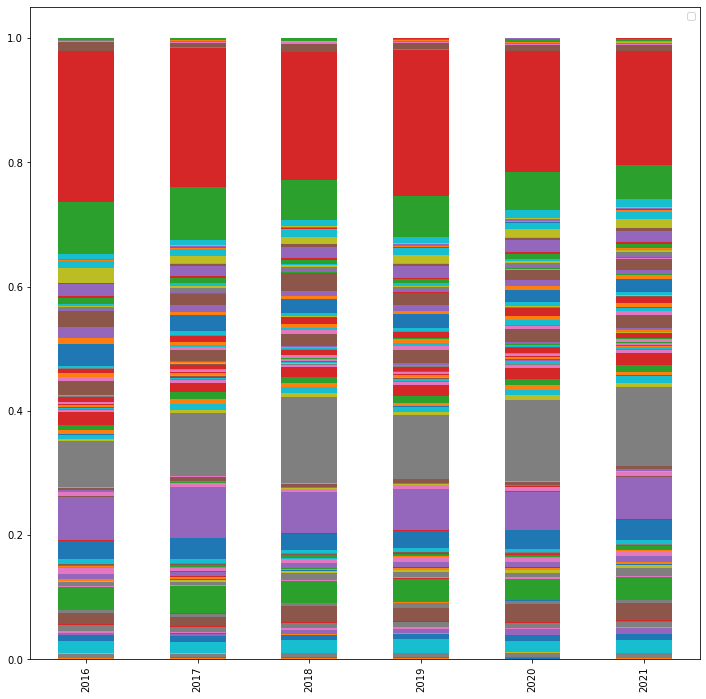

In [46]:
cnt_df.T.plot.bar(stacked=True, figsize=(12,12))
plt.legend([]);

I've suppressed the legend here because it was enormous, but the larger categories are the usual suspects - USA, UK, India and Germany.

To me, it looks as though there may be some interesting trends here. What I'll do is sort by popularity from in 2016, and only include the top 10-15 or so countries.

In [47]:
cnt_df['2016'].sort_values(ascending=False).head(25)

USA             0.244004
UK              0.082398
India           0.075551
Germany         0.069965
Canada          0.036469
Poland          0.035514
France          0.029298
Russia          0.025568
Sweden          0.023928
Netherlands     0.021406
Italy           0.020487
Australia       0.020126
Spain           0.018487
Brazil          0.018289
Romania         0.016973
Ukraine         0.014451
Denmark         0.010919
Switzerland     0.010343
Belgium         0.009784
Portugal        0.008937
Austria         0.008685
South Africa    0.008631
Israel          0.008072
Turkey          0.008018
Mexico          0.008000
Name: 2016, dtype: float64

In [48]:
a = set(cnt_df['2016'].sort_values(ascending=False).head(25).index)
b = set(cnt_df['2017'].sort_values(ascending=False).head(25).index)
c = set(cnt_df['2018'].sort_values(ascending=False).head(25).index)
d = set(cnt_df['2019'].sort_values(ascending=False).head(25).index)
e = set(cnt_df['2020'].sort_values(ascending=False).head(25).index)
f = set(cnt_df['2021'].sort_values(ascending=False).head(25).index)
(a & b & c & d & e & f)

{'Australia',
 'Austria',
 'Brazil',
 'Canada',
 'France',
 'Germany',
 'India',
 'Israel',
 'Italy',
 'Netherlands',
 'Poland',
 'Russia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'UK',
 'USA',
 'Ukraine'}

Here, any country in the top 25 in all lists strikes me as being relevant, so that's (in the 2016 order of descending size):

1. USA
2. UK
3. India
4. Germany
5. Canada
6. Poland
7. France 
8. Russia
9. Sweden
10. Netherlands
11. Italy
12. Australia
13. Spain    
14. Brazil
15. Ukraine
16. Switzerland
17. Austria
18. Israel
19. Turkey
20. Other

In [49]:
UNcnt_cat_dict2={
 'Afghanistan': 'Other',
 'Aland Islands': 'Other',
 'Albania': 'Other',
 'Algeria': 'Other',
 'American Samoa': 'USA',
 'Andorra': 'Other',
 'Angola': 'Other',
 'Anguilla': 'UK',
 'Antarctica': 'Other',
 'Antigua & Deps': 'Other',
 'Antigua and Barbuda': 'Other',
 'Argentina': 'Other',
 'Armenia': 'Other',
 'Aruba': 'Netherlands',
 'Australia': 'Australia',
 'Austria': 'Austria',
 'Azerbaidjan': 'Other',
 'Azerbaijan': 'Other',
 'Bahamas': 'Other',
 'Bahrain': 'Other',
 'Bangladesh': 'Other',
 'Barbados': 'Other',
 'Belarus': 'Other',
 'Belgium': 'Belgium',
 'Belize': 'Other',
 'Benin': 'Other',
 'Bermuda': 'Other',
 'Bhutan': 'Other',
 'Bolivia': 'Other',
 'Bosnia Herzegovina': 'Other',
 'Bosnia and Herzegovina': 'Other',
 'Bosnia-Herzegovina': 'Other',
 'Botswana': 'Other',
 'Bouvet Island': 'Other',
 'Brazil': 'Brazil',
 'British Indian Ocean Territory': 'UK',
 'Brunei Darussalam': 'Other',
 'Bulgaria': 'Other',
 'Burkina': 'Other',
 'Burkina Faso': 'Other',
 'Burundi': 'Other',
 'Cambodia': 'Other',
 'Cameroon': 'Other',
 'Canada': 'Canada',
 'Cape Verde': 'Other',
 'Cayman Islands': 'UK',
 'Central African Rep': 'Other',
 'Central African Republic': 'Other',
 'Chad': 'Other',
 'Chile': 'Other',
 'China': 'Other',
 'Christmas Island': 'Australia',
 'Colombia': 'Other',
 'Comoros': 'Other',
 'Congo, Republic of the...': 'Other',
 'Cook Islands': 'Other',
 'Costa Rica': 'Other',
 'Croatia': 'Other',
 'Cuba': 'Other',
 'Cyprus': 'Other',
 'Czech Republic': 'Other',
 "Côte d'Ivoire": "Other",
 "Democratic People's Republic of Korea": "Other",
 'Democratic Republic of the Congo': 'Other',
 'Denmark': 'Other',
 'Djibouti': 'Other',
 'Dominica': 'Other',
 'Dominican Republic': 'Other',
 'East Timor': 'Other',
 'Ecuador': 'Other',
 'Egypt': 'Other',
 'El Salvador': 'Other',
 'Eritrea': 'Other',
 'Estonia': 'Other',
 'Ethiopia': 'Other',
 'Falkland Islands': 'UK',
 'Fiji': 'Other',
 'Finland': 'Other',
 'France': 'France',
 'French Guyana': 'France',
 'Gabon': 'Other',
 'Gambia': 'Other',
 'Georgia': 'Other',
 'Germany': 'Germany',
 'Ghana': 'Other',
 'Gibraltar': 'UK',
 'Greece': 'Other',
 'Grenada': 'Other',
 'Guam': 'USA',
 'Guatemala': 'Other',
 'Guinea': 'Other',
 'Guinea-Bissau': 'Other',
 'Guyana': 'Other',
 'Haiti': 'Other',
 'Heard and McDonald Islands': 'Australia',
 'Honduras': 'Other',
 'Hong Kong': 'Other',
 'Hong Kong (S.A.R.)': 'Other',
 'Hungary': 'Other',
 'I prefer not to say': np.nan,
 'Iceland': 'Other',
 'India': 'India',
 'Indonesia': 'Other',
 'Iran': 'Other',
 'Iran, Islamic Republic of...': 'Other',
 'Iraq': 'Other',
 'Ireland': 'Other',
 'Ireland {Republic}': 'Other',
 'Isle of Man': 'UK',
 'Israel': 'Israel',
 'Italy': 'Italy',
 'Ivory Coast': 'Other',
 "Ivory Coast (Cote D'Ivoire)": "Other",
 'Jamaica': 'Other',
 'Japan': 'Other',
 'Jordan': 'Other',
 'Kazakhstan': 'Other',
 'Kenya': 'Other',
 'Kiribati': 'Other',
 'Korea North': 'Other',
 'Korea South': 'Other',
 'Kosovo': 'Other',
 'Kuwait': 'Other',
 'Kyrgyzstan': 'Other',
 "Lao People's Democratic Republic": "Other",
 'Laos': 'Other',
 'Latvia': 'Other',
 'Lebanon': 'Other',
 'Lesotho': 'Other',
 'Liberia': 'Other',
 'Libya': 'Other',
 'Libyan Arab Jamahiriya': 'Other',
 'Liechtenstein': 'Other',
 'Lithuania': 'Other',
 'Luxembourg': 'Other',
 'Macau': 'Other',
 'Macedonia': 'Other',
 'Madagascar': 'Other',
 'Malawi': 'Other',
 'Malaysia': 'Other',
 'Maldives': 'Other',
 'Mali': 'Other',
 'Malta': 'Other',
 'Marshall Islands': 'Other',
 'Martinique (French)': 'France',
 'Mauritania': 'Other',
 'Mauritius': 'Other',
 'Mexico': 'Other',
 'Micronesia': 'Other',
 'Micronesia, Federated States of...': 'Other',
 'Moldavia': 'Other',
 'Moldova': 'Other',
 'Monaco': 'Other',
 'Mongolia': 'Other',
 'Montenegro': 'Other',
 'Montserrat': 'UK',
 'Morocco': 'Other',
 'Mozambique': 'Other',
 'Myanmar': 'Other',
 'Myanmar, {Burma}': 'Other',
 'Namibia': 'Other',
 'Nauru': 'Other',
 'Nepal': 'Other',
 'Netherlands': 'Netherlands',
 'Netherlands Antilles': 'Netherlands',
 'New Caledonia (French)': 'France',
 'New Zealand': 'Other',
 'Nicaragua': 'Other',
 'Niger': 'Other',
 'Nigeria': 'Other',
 'Nomadic': np.nan,
 'North Korea': 'Other',
 'Northern Mariana Islands': 'USA',
 'Norway': 'Other',
 'Oman': 'Other',
 'Other (please specify)': np.nan,
 'Other Country (Not Listed Above)': np.nan,
 'Pakistan': 'Other',
 'Palau': 'Other',
 'Palestine': 'Israel',
 'Panama': 'Other',
 'Papua New Guinea': 'Other',
 'Paraguay': 'Other',
 'Peru': 'Other',
 'Philippines': 'Other',
 'Pitcairn Island': 'UK',
 'Poland': 'Poland',
 'Polynesia (French)': 'France',
 'Portugal': 'Other',
 'Puerto Rico': 'USA',
 'Qatar': 'Other',
 'Republic of Korea': 'Other',
 'Republic of Moldova': 'Other',
 'Reunion (French)': 'France',
 'Romania': 'Other',
 'Russian Federation': 'Russia',
 'Rwanda': 'Other',
 'S. Georgia & S. Sandwich Isls.': 'UK',
 'Saint Helena': 'UK',
 'Saint Kitts and Nevis': 'Other',
 'Saint Lucia': 'Other',
 'Saint Vincent & Grenadines': 'Other',
 'Saint Vincent and the Grenadines': 'Other',
 'San Marino': 'Other',
 'Sao Tome & Principe': 'Other',
 'Sao Tome and Principe': 'Other',
 'Saudi Arabia': 'Other',
 'Senegal': 'Other',
 'Serbia': 'Other',
 'Seychelles': 'Other',
 'Sierra Leone': 'Other',
 'Singapore': 'Other',
 'Slovak Republic': 'Other',
 'Slovakia': 'Other',
 'Slovenia': 'Other',
 'Solomon Islands': 'Other',
 'Somalia': 'Other',
 'South Africa': 'Other',
 'South Korea': 'Other',
 'Spain': 'Spain',
 'Sri Lanka': 'Other',
 'St Kitts & Nevis': 'Other',
 'Sudan': 'Other',
 'Suriname': 'Other',
 'Swaziland': 'Other',
 'Sweden': 'Sweden',
 'Switzerland': 'Switzerland',
 'Syria': 'Other',
 'Syrian Arab Republic': 'Other',
 'Tadjikistan': 'Other',
 'Taiwan': 'Other',
 'Tajikistan': 'Other',
 'Tanzania': 'Other',
 'Thailand': 'Other',
 'The former Yugoslav Republic of Macedonia': 'Other',
 'Timor-Leste': 'Other',
 'Togo': 'Other',
 'Tonga': 'Other',
 'Trinidad & Tobago': 'Other',
 'Trinidad and Tobago': 'Other',
 'Tunisia': 'Other',
 'Turkey': 'Turkey',
 'Turkmenistan': 'Other',
 'Tuvalu': 'Other',
 'U.S. Minor Outlying Islands': 'USA',
 'Uganda': 'Other',
 'Ukraine': 'Ukraine',
 'United Arab Emirates': 'Other',
 'United Kingdom': 'UK',
 'United Kingdom of Great Britain and Northern Ireland': 'UK',
 'United Republic of Tanzania': 'Other',
 'United States': 'USA',
 'United States of America': 'USA',
 'Uruguay': 'Other',
 'Uzbekistan': 'Other',
 'Vanuatu': 'Other',
 'Vatican City': 'Other',
 'Vatican City State': 'Other',
 'Venezuela': 'Other',
 'Venezuela, Bolivarian Republic of...': 'Other',
 'Viet Nam': 'Other',
 'Vietnam': 'Other',
 'Virgin Islands (British)': 'UK',
 'Virgin Islands (USA)': 'USA',
 'Yemen': 'Other',
 'Zaire': 'Other',
 'Zambia': 'Other',
 'Zimbabwe': 'Other'}

In [50]:
# Creating dictionaries for counts:
cnt_counts16 = {}
cnt_counts16 = update_cnt_dictionary(df16, "country", cnt_counts16, UNcnt_cat_dict2)
cnt_counts17 = {}
cnt_counts17 = update_cnt_dictionary(df17, "Country", cnt_counts17, UNcnt_cat_dict2)
cnt_counts18 = {}
cnt_counts18 = update_cnt_dictionary(df18, "Country", cnt_counts18, UNcnt_cat_dict2)
cnt_counts19 = {}
cnt_counts19 = update_cnt_dictionary(df19, "Country", cnt_counts19, UNcnt_cat_dict2)
cnt_counts20 = {}
cnt_counts20 = update_cnt_dictionary(df20, "Country", cnt_counts20, UNcnt_cat_dict2)
cnt_counts21 = {}
cnt_counts21 = update_cnt_dictionary(df21, "Country", cnt_counts21, UNcnt_cat_dict2)

# Producing list of countries in 2016 descending order
UN_cnt_list2 = ['USA', 'UK', 'India', 'Germany', 'Canada', 'Poland', 'France', 'Russia',
                'Sweden', 'Netherlands', 'Italy', 'Australia', 'Spain', 'Brazil', 'Ukraine',
                'Switzerland', 'Austria', 'Israel', 'Turkey', 'Other']

# Creating a pandas series from the 2016 data
cnt16 = pd.Series(cnt_counts16, name='2016', index=UN_cnt_list2)
# And turning it into a dataframe
cnt_df = pd.DataFrame(cnt16/cnt16.sum())

# Creating pandas series for the other datasets
cnt17 = pd.Series(cnt_counts17, name='2017', index=UN_cnt_list2)
cnt18 = pd.Series(cnt_counts18, name='2018', index=UN_cnt_list2)
cnt19 = pd.Series(cnt_counts19, name='2019', index=UN_cnt_list2)
cnt20 = pd.Series(cnt_counts20, name='2020', index=UN_cnt_list2)
cnt21 = pd.Series(cnt_counts21, name='2021', index=UN_cnt_list2)

# Joining them together (dividing by number of rows so values reflect
# proportions of non-NaN respondents)
cnt_df = cnt_df.join([cnt17/cnt17.sum(), cnt18/cnt18.sum(), cnt19/cnt19.sum(), 
                       cnt20/cnt20.sum(), cnt21/cnt21.sum()])
cnt_df

,2016,2017,2018,2019,2020,2021
USA,0.246415,0.225987,0.208050,0.238360,0.196109,0.184888
UK,0.083212,0.086690,0.063729,0.065276,0.061401,0.054180
India,0.076297,0.102207,0.140561,0.103097,0.132160,0.127116
Germany,0.070657,0.081478,0.066167,0.066744,0.061181,0.068027
Canada,0.036829,0.043915,0.034759,0.038629,0.034459,0.036426
Poland,0.035865,0.025370,0.021738,0.021869,0.020100,0.021829
France,0.029587,0.034534,0.026348,0.027205,0.029851,0.032750
Russia,0.025821,0.017169,0.029391,0.019275,0.017175,0.017826
Sweden,0.024165,0.012016,0.011924,0.014496,0.013935,0.014464
Netherlands,0.021617,0.016913,0.018860,0.021072,0.021122,0.021430


# 4. Evaluate the Results

We are now in a position to bring together the results. In what follows, I will be relying on stacked bar charts to represent how the respondents to the Stack Overflow survey have changed from 2016 to 2021, and using simple descriptive statistics such as the proportion of valid responses or percentage changes in proportions over time. I have not used a predictive model as such. However, in seeking to draw inferences about the world of tech, or at least the anglophone slice of that world, I am relying on the basic assumption that changes in the Stack Overflow responses will be mirrored in the larger community. 

Are there good reasons to think this? Well, yes. The size of the survey is definitely one point in its favour. If I have a survey of 3 billion people, its sheer size imposes a hard limit on how unrepresentative it can be. When you consider that 2016 on all have 50,000+ respondents, that mean it can't be wildly unrepresentative, at least of the anglophone tech development scene. 

### What Size Organisation do People Work For?

Another reassuring sign is the relative stability of the responses. One of the questions I was interested in was whether there was any change in the period 2016-2021 in terms of the size of the organisations respondents work for. Below can be seen the answer:

In [51]:
# Creating a color palette for 8 categories
a=list(sns.color_palette("hls", n_colors=8))
cpal8 = []
for i in range(0, 8):
    index = int(3*i % 8)
    cpal8.append(a[index])
    
# Creating a color palette for 13 categories
a=list(sns.color_palette("hls", n_colors=13))
cpal13 = []
for i in range(0, 13):
    index = int(4*i % 13)
    cpal13.append(a[index])
    
# Creating a color palette for 20 categories
a=list(sns.color_palette("hls", n_colors=20))
cpal20 = []
for i in range(0, 20):
    index = int(7*i % 20)
    cpal20.append(a[index])

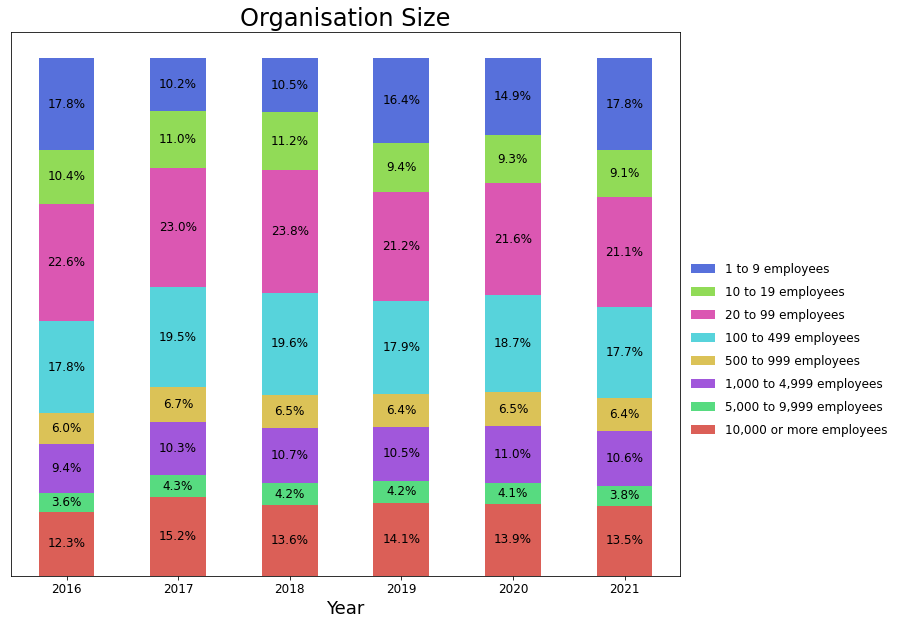

In [52]:
dft = org_df.T
ax = dft.plot.bar(stacked=True, figsize=(12,10), color=cpal8)
plt.legend(bbox_to_anchor=(1,0.3), labelspacing=-3, fontsize=12, frameon=False)
plt.xlabel('Year', fontsize=18)
plt.yticks([])
plt.xticks(rotation=0, fontsize=12)
plt.title('Organisation Size', fontsize=24);

# Add annotations
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = '{:.1f}%'.format(height*100)

    label_x = x + width / 2
    label_y = y + height / 2

    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
    
plt.savefig('orgsize.png', dpi=200, bbox_inches="tight")

The modal class for organisation size is 20-99 employees, and this remains the case throughout the time period in question, with approximately 22% of respondents (who answered this question) selecting that category in any given year. In general, all the categories show the same level of consistency over the time period studied. The only slight wrinkle is the drop from 2016 to 2017 in the 1 to 9 employees category, but it's nothing to write home about. Overall, what we're seeing here is that the same sort of people are answering the survey from year to year.

### What Country are People From?

Consistency is also the main takehome message from a plot of what country respondents (who gave an answer) say they're in. This plot can be seen below (although only boxes representing 2.5%+ of the respondents in that year are annotated):

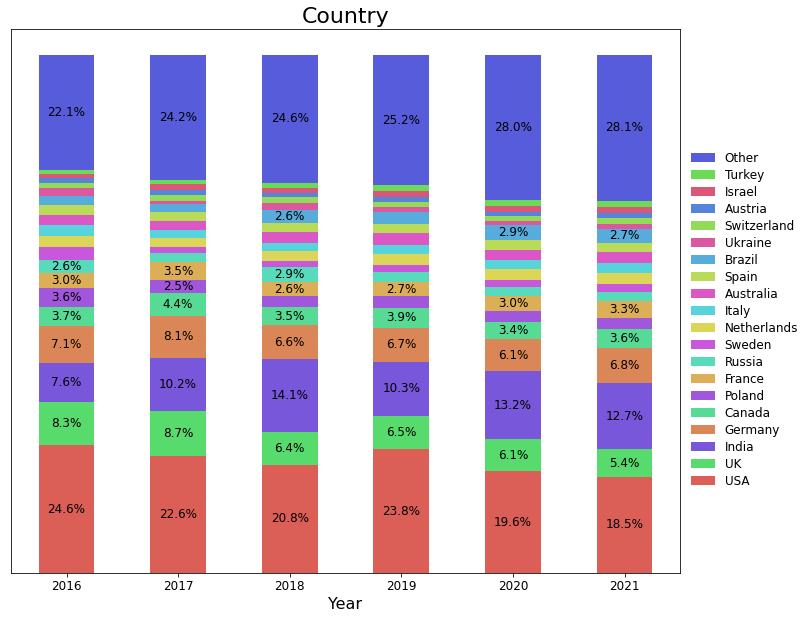

In [53]:
dft = cnt_df.T
ax = dft.plot.bar(stacked=True, figsize=(12,10), color=cpal20)
plt.legend(bbox_to_anchor=(1,0.2), labelspacing=-2.5, fontsize=12, frameon=False)
plt.xlabel('Year', fontsize=16)
plt.yticks([])
plt.xticks(rotation=0, fontsize=12)
plt.title('Country', fontsize=22);

# Add annotations
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = '{:.1f}%'.format(height*100)

    label_x = x + width / 2
    label_y = y + height / 2
    
    if height > 0.025:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
        
plt.savefig('country.png', dpi=200, bbox_inches="tight")

In spite of the fact that Stack Overflow is conducted in English, the site commands an impressive international following, with (for me, at least) a surprisingly large presence coming from Germany, Poland, France, Russia, and Brazil.

Some overall trends can be discerned too, I believe:

* The dominance of the US is declining. With the exception of 2019, the proportion of Stack Overflow users hailing from the US goes down by about 1% every year. 
* The UK is also going backwards, relatively-speaking. The proportion of UK users declined from 8.7% in 2017 to 5.4% in 2021.
* No one country is benefitting in particular - rather, 'Other' seems to be the only category that is experiencing consistent growth as more and more countries develop the infrastructure needed to sustain a tech industry. Intuitively, I would have expected India to have surged forward in this time period, but that is not the case. It's possible that skilled users in India are simply emigrating once they've built up a sufficient portfolio of skills in India.

This matters, I would say, because it underlines what people out there looking for jobs already understand - it's competitive out there, and it's getting more competitive. Thus, it pays to look for anything that might give you an edge in the jobs market. This brings me to...

### What Programming Languages are People Using?

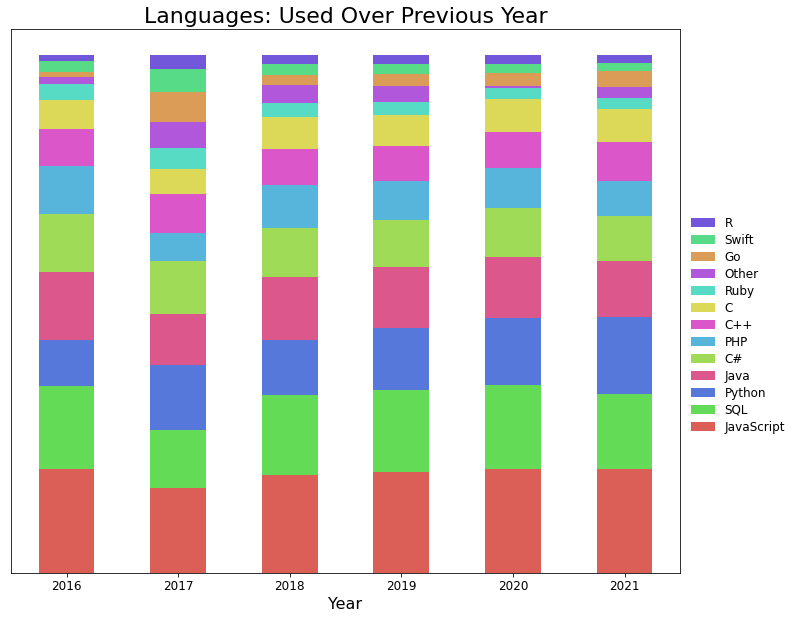

In [54]:
# Creating a chart for languages used over previous year
dft = work_df.T
new_column_list = list(dft.sum().sort_values(ascending=False).index)
dft = dft.reindex(columns = new_column_list)
dft = dft.apply(lambda x: x/x.sum(), axis=1)
dft.plot.bar(stacked=True, figsize=(12,10), color=cpal13)
plt.legend(bbox_to_anchor=(1,0.3), labelspacing=-2.5, fontsize=12, frameon=False)
plt.xlabel('Year', fontsize=16)
plt.yticks([])
plt.xticks(rotation=0, fontsize=12)
plt.title('Languages: Used Over Previous Year', fontsize=22);

plt.savefig('langused.png', dpi=200, bbox_inches="tight")

Apart from the slightly anomalous results from 2017, the proportions in terms of which programming languages respondents are using are relatively constant. 

One thing to emphasise is that Python looks to be a good bet for the immediate future (which is good news for me seeing as it's what I've just been using!), but that knowing Java, JavaScript and SQL, as well as some variant of C, all remain solid options and are likely to remain solid options for the foreseeable future.

These are all fairly safe options, however. Might there be something more novel lurking in the results when we ask...

### What Programming Languages are People Using?

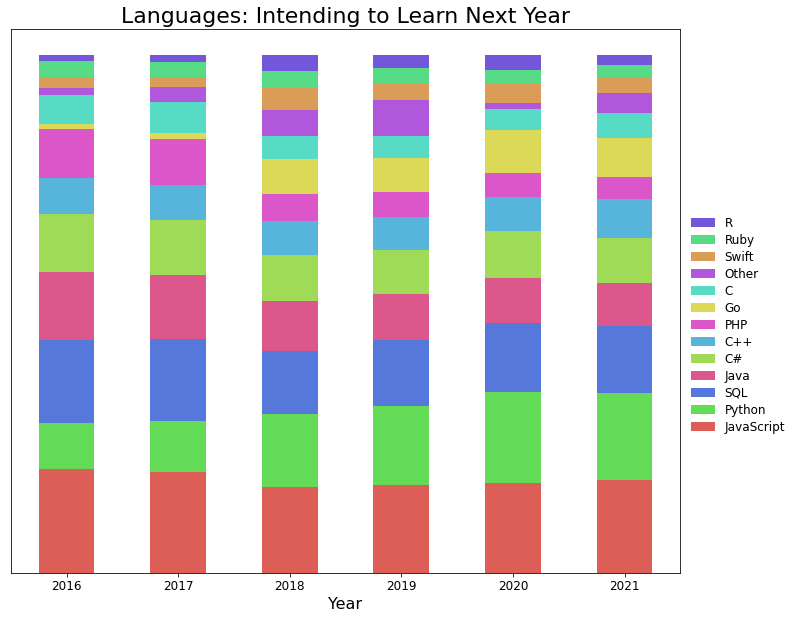

In [55]:
# Creating chart for Languages: Intending to Learn
   
dft = want_df.T
new_column_list = list(dft.sum().sort_values(ascending=False).index)
dft = dft.reindex(columns = new_column_list)
dft = dft.apply(lambda x: x/x.sum(), axis=1)
dft.plot.bar(stacked=True, figsize=(12,10), color=cpal13)
plt.legend(bbox_to_anchor=(1,0.3), labelspacing=-2.5, fontsize=12, frameon=False)
plt.xlabel('Year', fontsize=16)
plt.yticks([])
plt.xticks(rotation=0, fontsize=12)
plt.title('Languages: Intending to Learn Next Year', fontsize=22);

plt.savefig('langwant.png', dpi=200, bbox_inches="tight")

We have similar results to the programming languages people have been using, but they're not exactly the same.

One thing that is notable is the way Go has managed to squeeze in there in terms of people's programming aspirations, presumably because it has the support of Alphabet and people are trying to read the tea leaves a little. It may be 'Learn Go' is one of those things that people are always intending to get around to doing, the 'Read _Moby Dick_' of programming if you will. (Incidentally, don't read _Moby Dick_. Unless you're on a search for the dullest read known to man, in which case you've found your, er... Moby Dick.) 

Aspirations to learn the most popular languages (JavaScript, Python, SQL, Java, C, C#, C++, PHP) more or less match their actual usage, which probably reflects the belief that these languages will continue to be useful in the future. Due to the way standardisation works, this is something of a self-fulfilling prophesy, so learning any language from this list is a solid bet.

# 5. Implement

All that remains to do now is to convert this material into a short blog format and update the relevant github files (including the readme), which will bring this project to a close.